# Notebook Setup

## Import

In [1]:
# System.
import os

# Data handling.
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Models.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Plotting.
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm import tqdm

# Dataset

In [2]:
# Check file.
DATASET_FILEPATH = "./dataset/credit_card_dataset.csv"
assert os.path.exists(path=DATASET_FILEPATH), f"File {DATASET_FILEPATH} does not exist."

In [3]:
# Loading dataset.
df = pd.read_csv(filepath_or_buffer=DATASET_FILEPATH)

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Missing values

In [10]:
# Fill CREDIT_LIMIT with mode.
df_2 = df.copy()
credit_limit_mode = df_2["CREDIT_LIMIT"].mode()[0]
df_2["CREDIT_LIMIT"] = df_2["CREDIT_LIMIT"].fillna(value=credit_limit_mode)

In [11]:
# Drop missing rows.
df_3 = df_2.dropna(axis=0)
df_3.reset_index(drop=True, inplace=True)

In [12]:
df_3.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data visualization

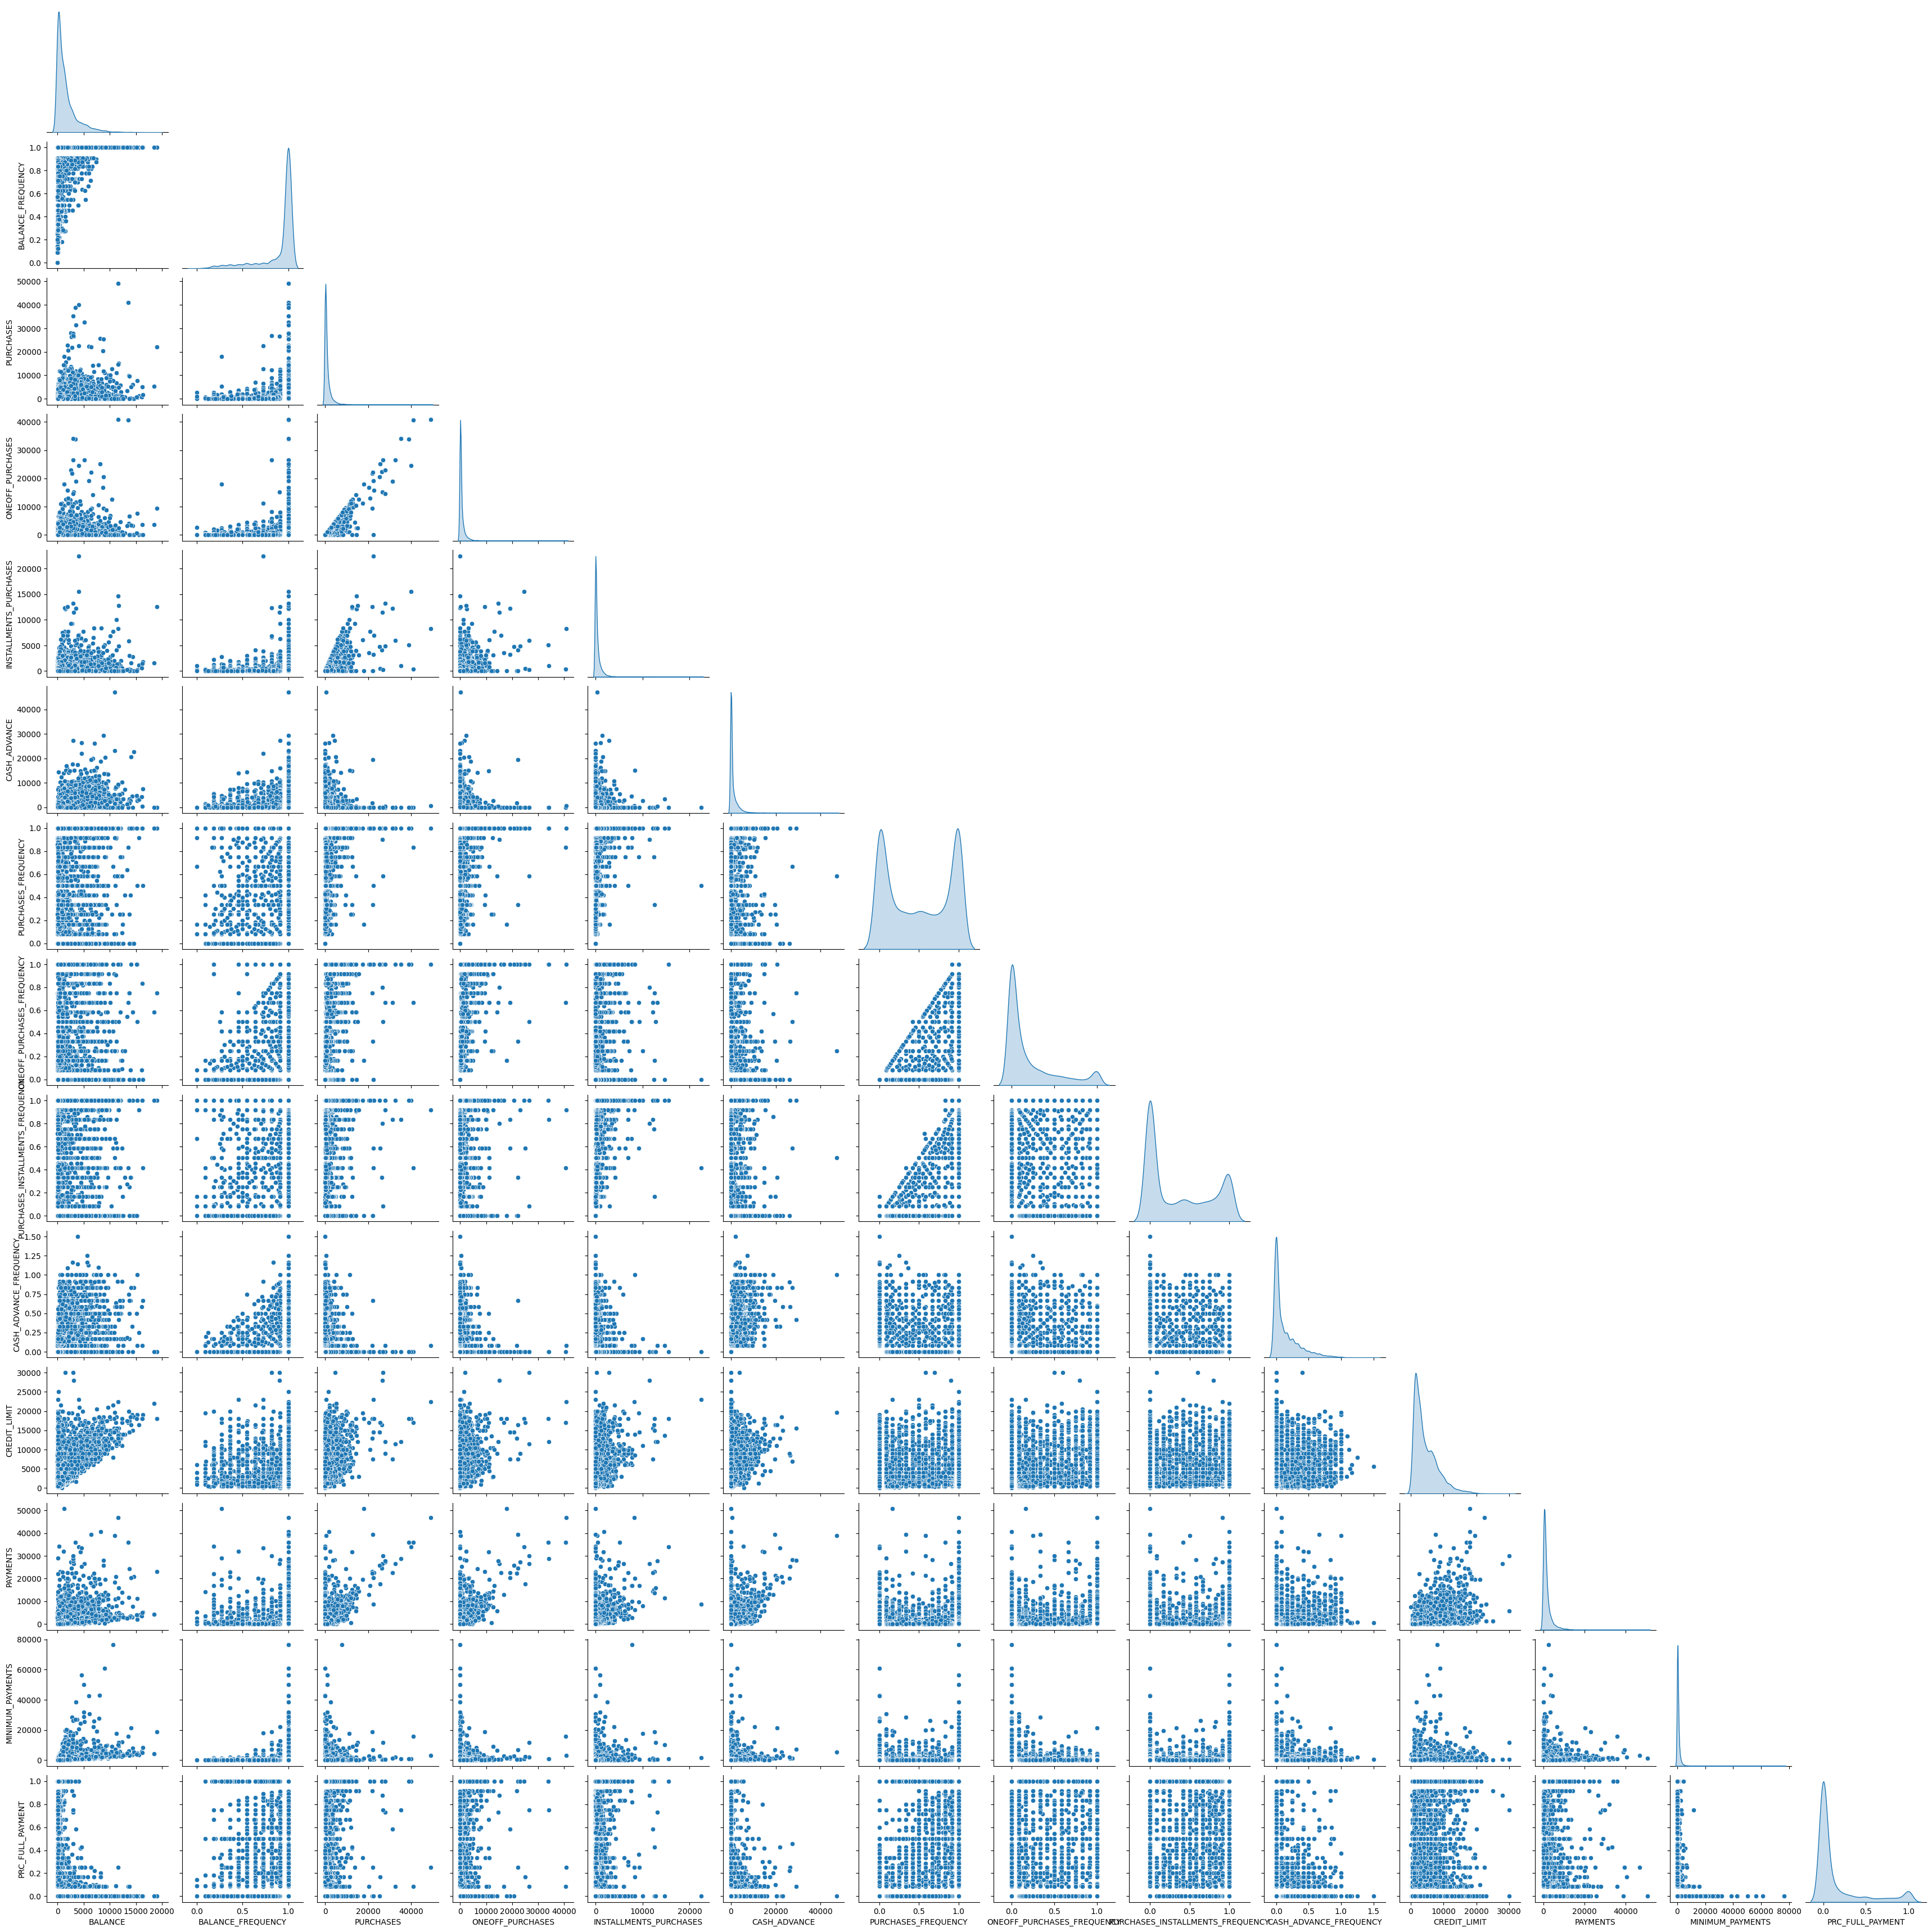

In [13]:
sns.pairplot(
    data=df_3.select_dtypes(include="float64"),
    diag_kind="kde",
    corner=True
)
plt.show()

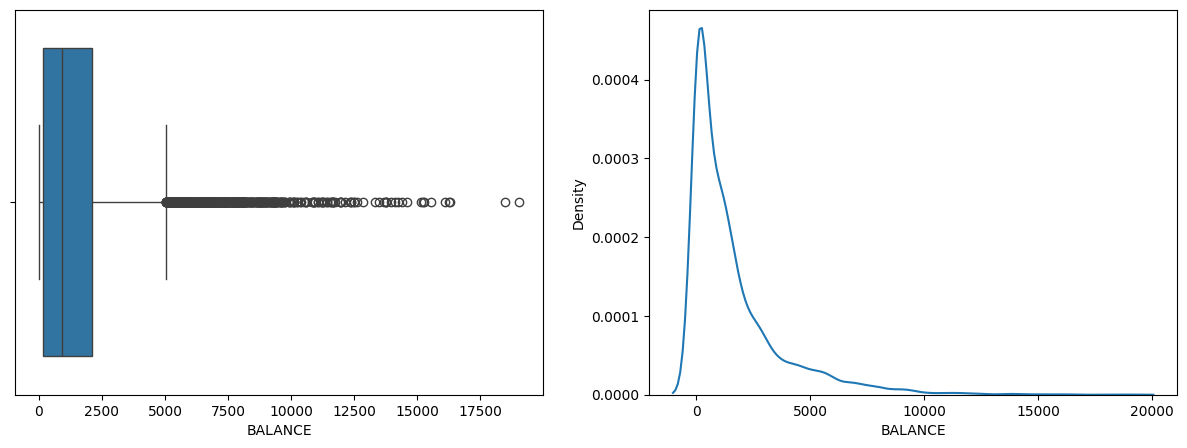

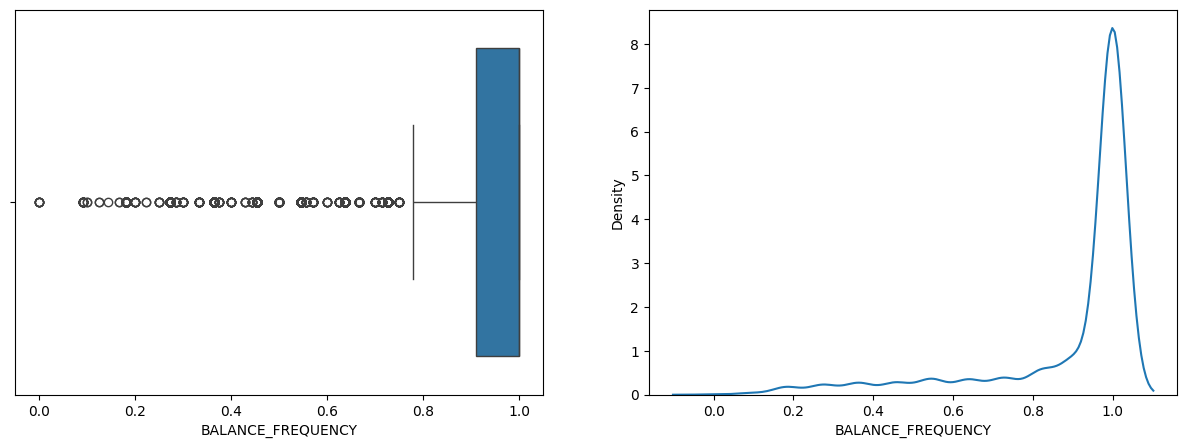

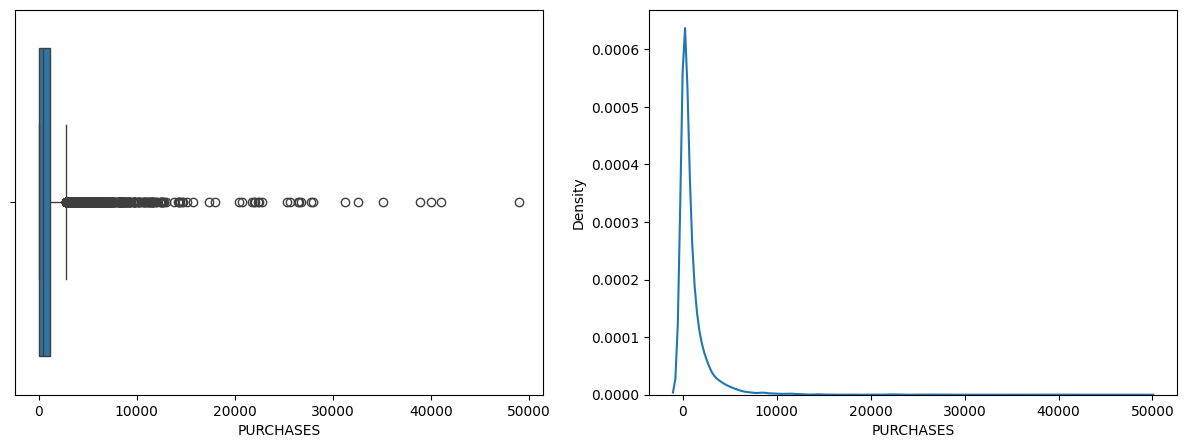

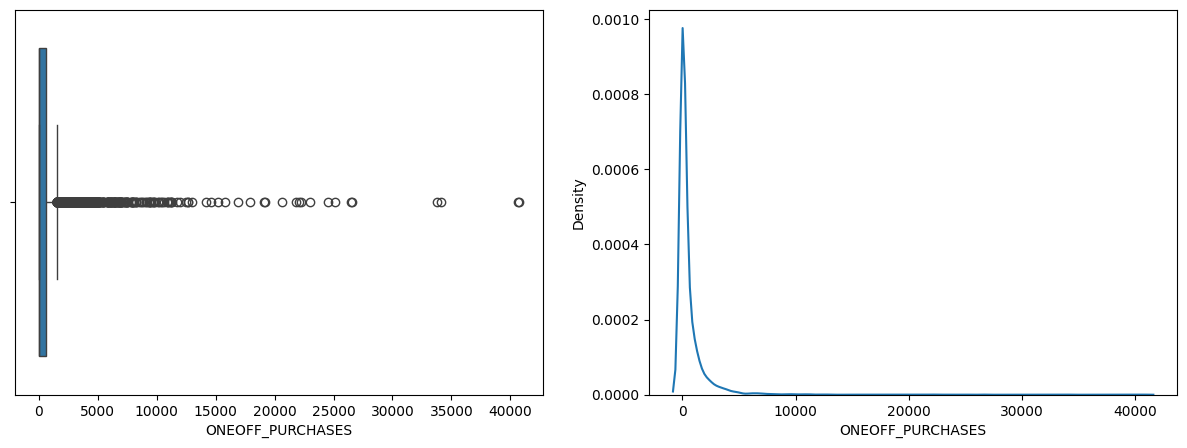

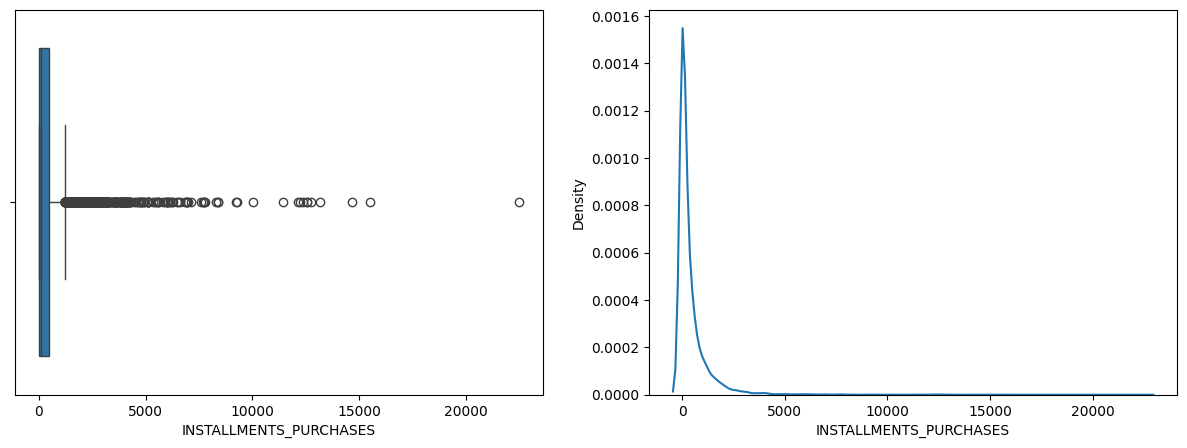

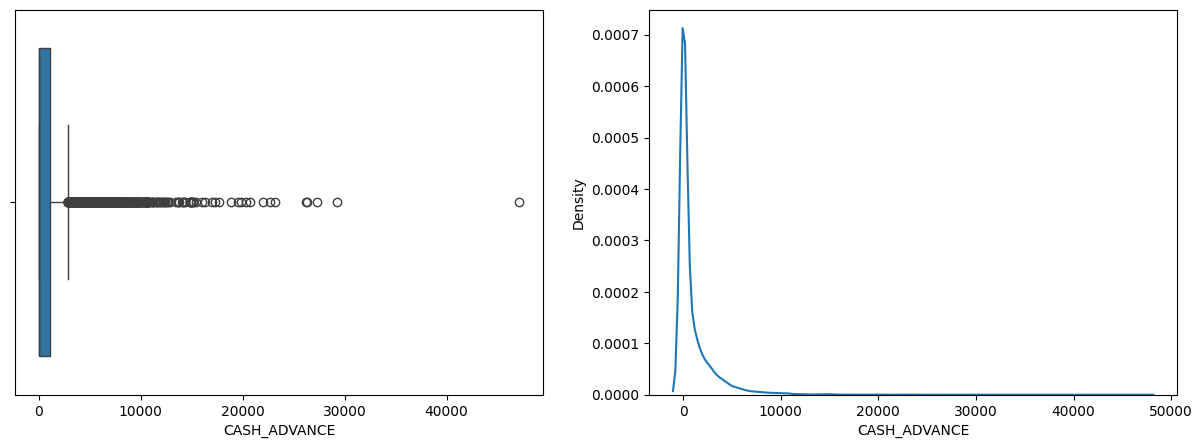

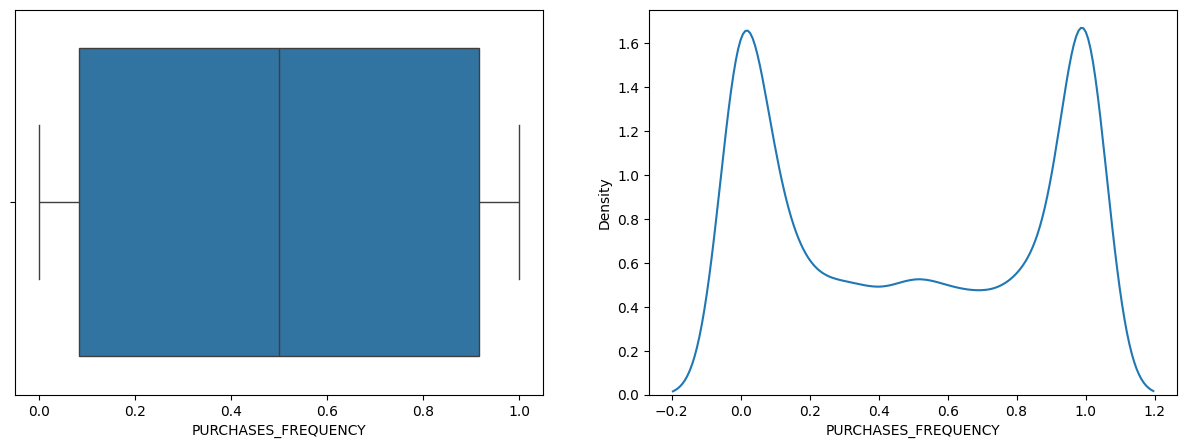

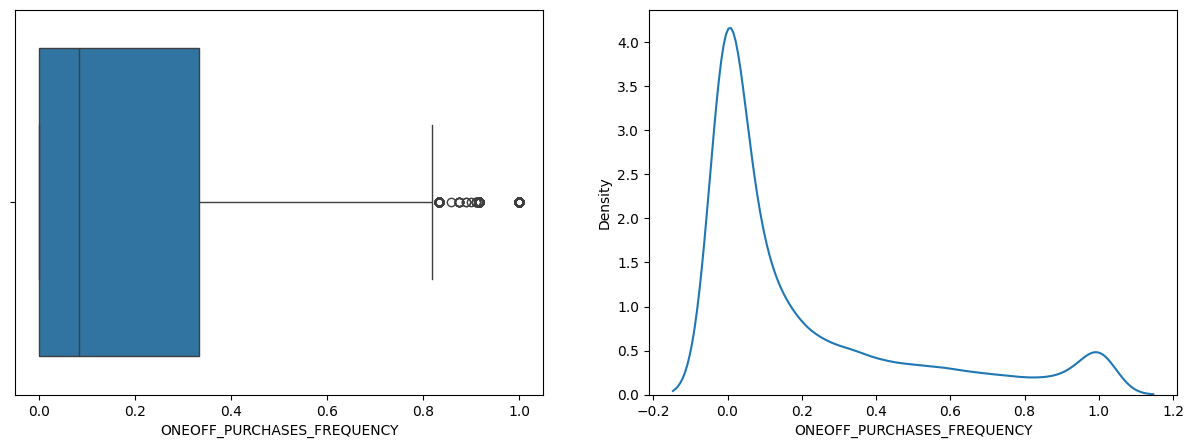

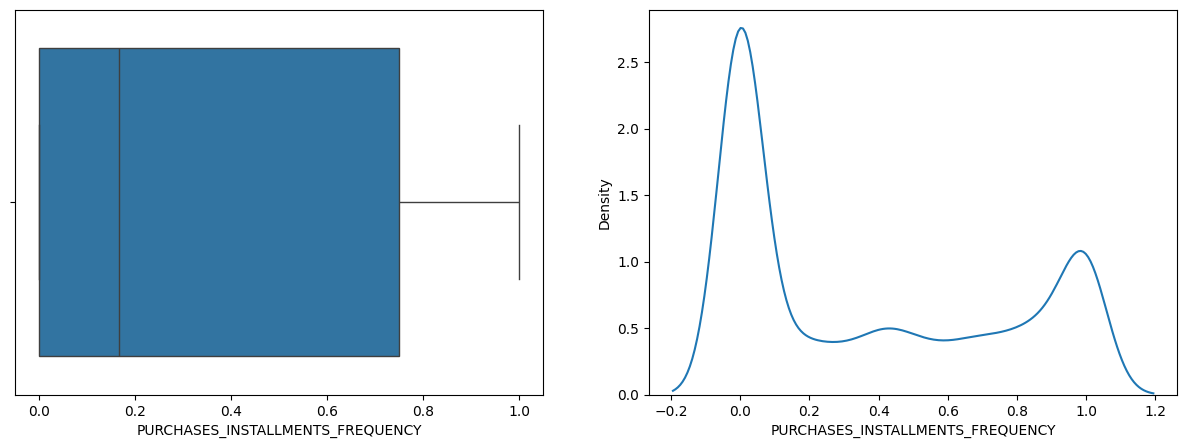

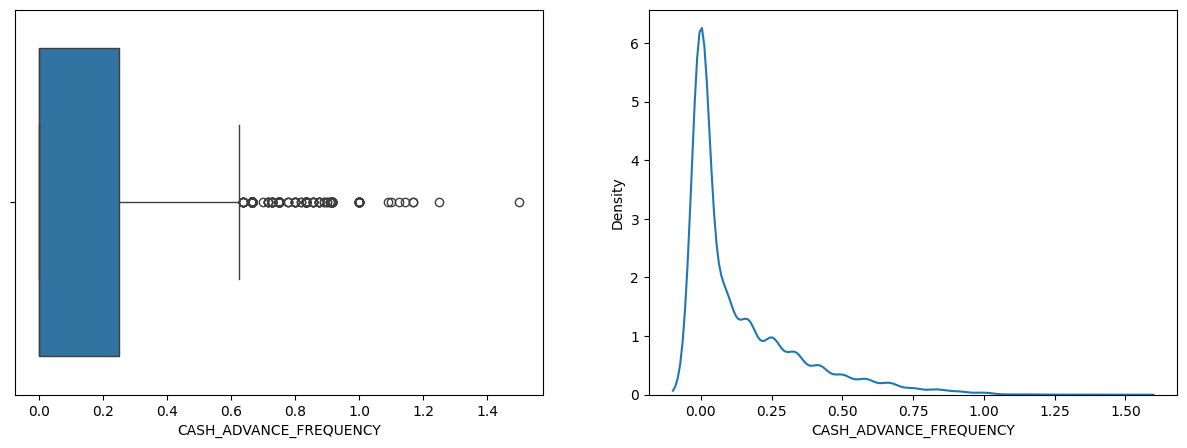

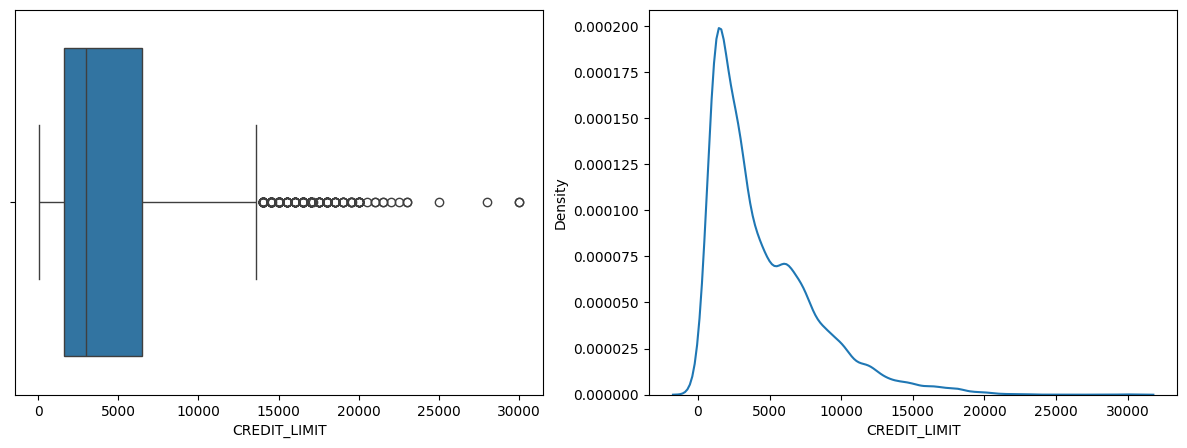

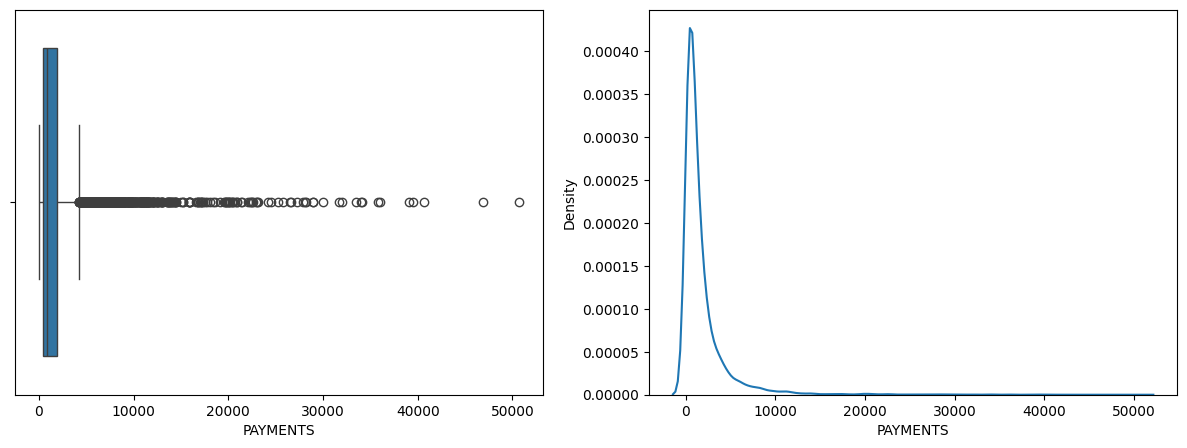

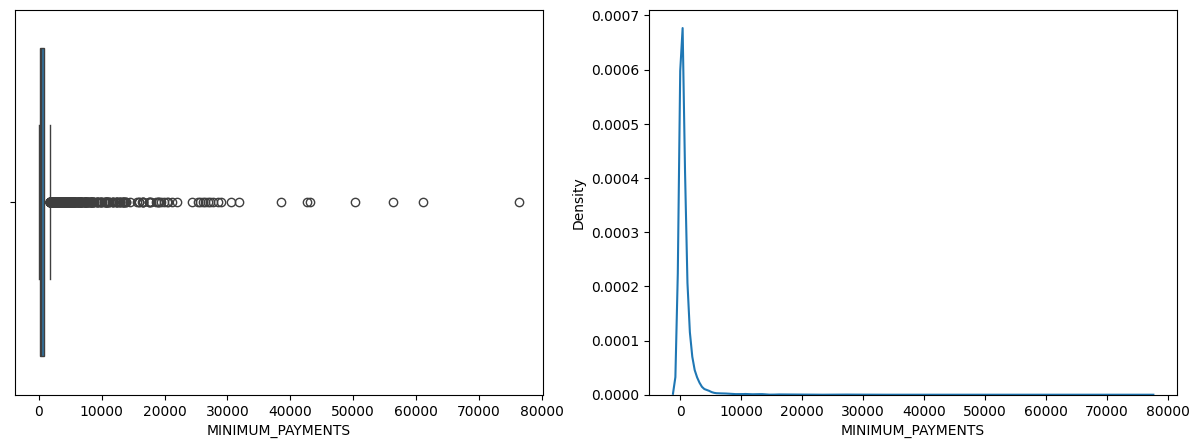

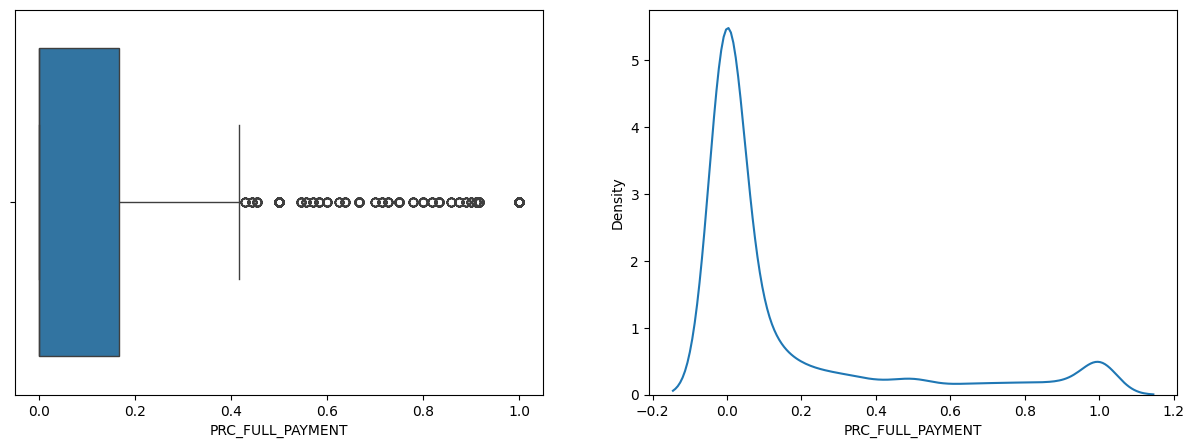

In [14]:
df_float_columns = df_3.select_dtypes(include="float64")

for column in df_float_columns.columns:

    fig, ax = plt.subplots(ncols=2, figsize=(15,5))

    sns.boxplot(
        data=df_float_columns,
        x=column,
        ax=ax[0]
    )

    sns.kdeplot(
        data=df_float_columns,
        x=column,
        ax=ax[1]
    )

    plt.show()

### Outliers

In [15]:
df_3_no_outliers = df_3.copy()

df_3_no_outliers.loc[df_3_no_outliers["BALANCE"] > 10_000, "BALANCE"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["PURCHASES"] > 20_000, "PURCHASES"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["ONEOFF_PURCHASES"] > 20_000, "ONEOFF_PURCHASES"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["INSTALLMENTS_PURCHASES"] > 5_000, "INSTALLMENTS_PURCHASES"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["CASH_ADVANCE"] > 10_000, "CASH_ADVANCE"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["CREDIT_LIMIT"] > 20_000, "CREDIT_LIMIT"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["PAYMENTS"] > 20_000, "PAYMENTS"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["MINIMUM_PAYMENTS"] > 10_000, "MINIMUM_PAYMENTS"] = np.nan

df_3_no_outliers.loc[df_3_no_outliers["BALANCE_FREQUENCY"] < 0.4, "BALANCE_FREQUENCY"] = np.nan
df_3_no_outliers.loc[df_3_no_outliers["CASH_ADVANCE_FREQUENCY"] > 0.75, "CASH_ADVANCE_FREQUENCY"] = np.nan

df_3_no_outliers.dropna(axis=0, inplace=True)
df_3_no_outliers.reset_index(drop=True, inplace=True)

In [16]:
print(df_3.shape)
print(df_3_no_outliers.shape)
df_3_no_outliers.head()

(8637, 18)
(7742, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10005   817.714335           1.000000      16.00             16.00   
4  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00      0.000000             0.083333   
4                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
3                    0.00                 0              1        1200.0   
4                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3   678.334763        244.791237          0.000000      12  
4  1400.057770       2407.246035          0.000000      12

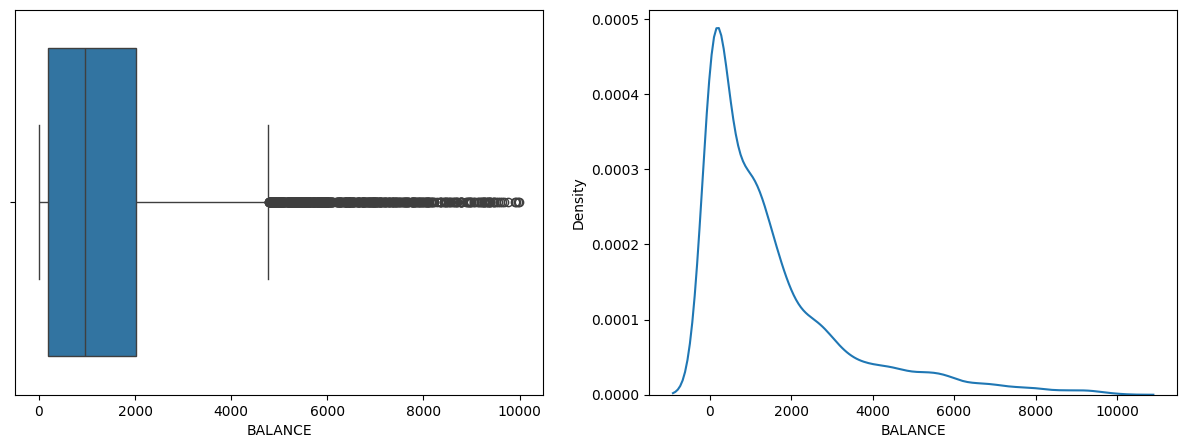

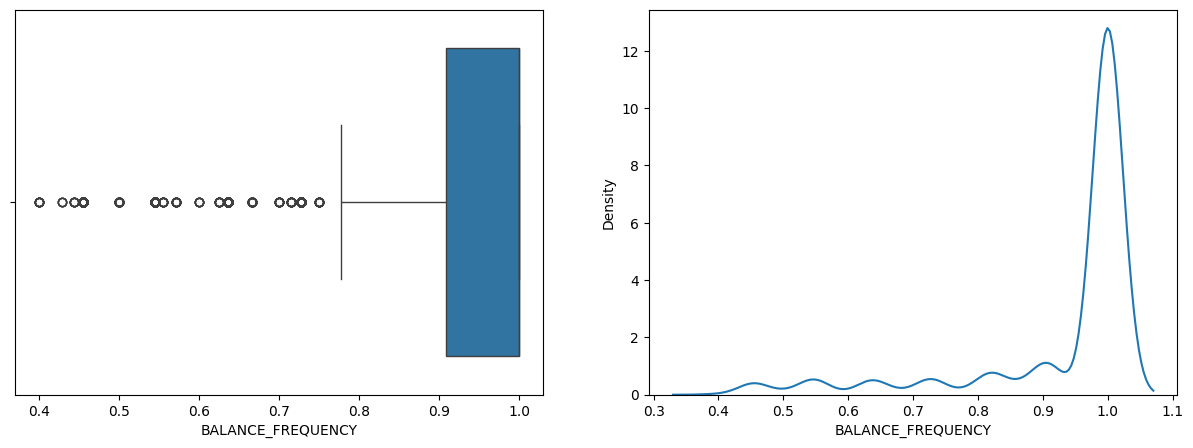

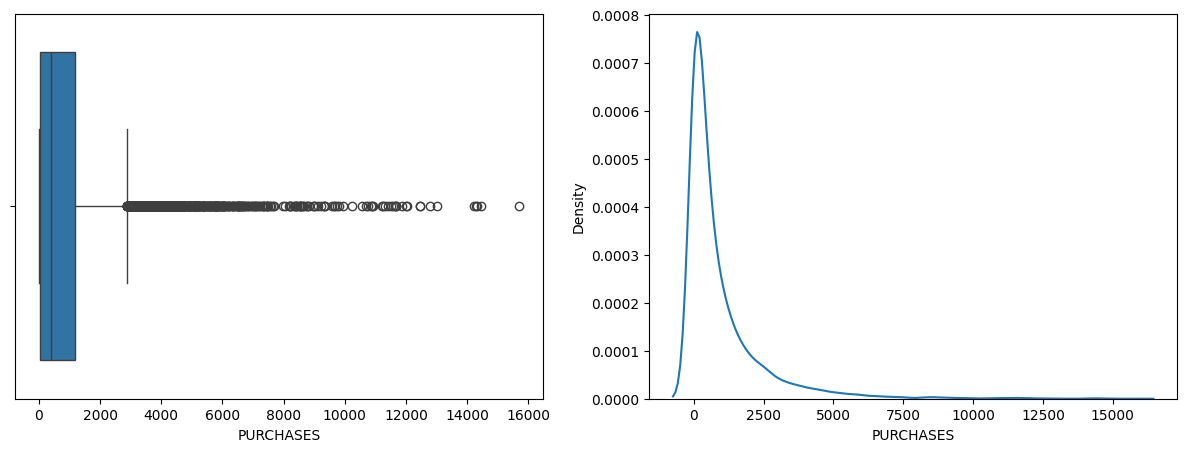

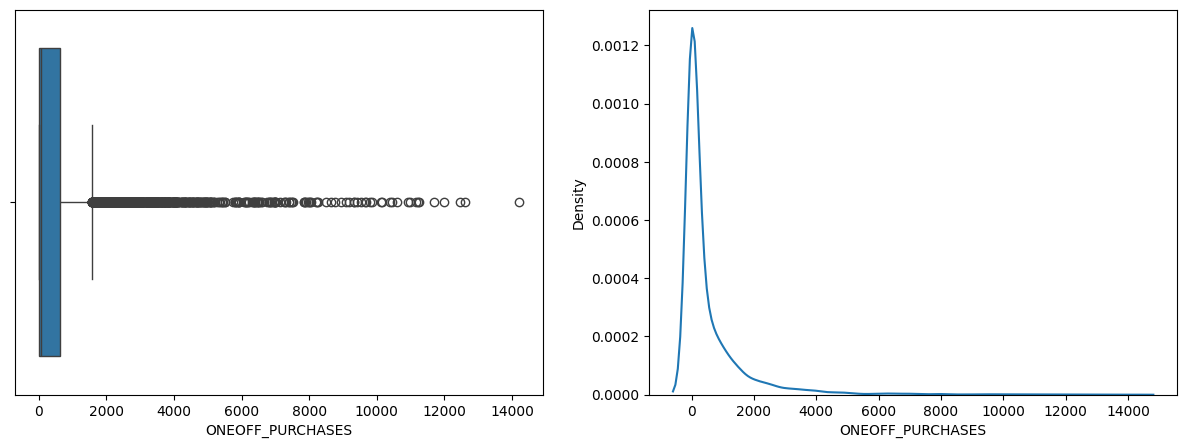

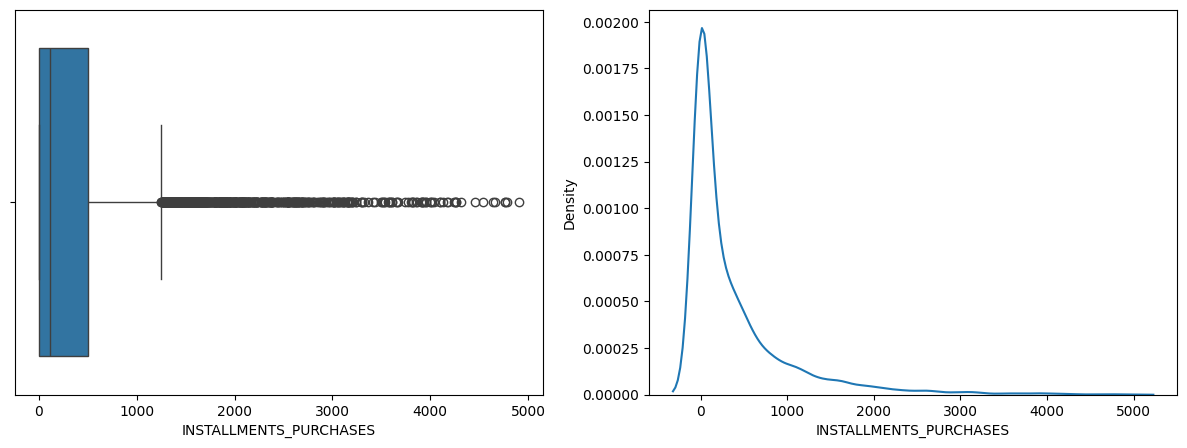

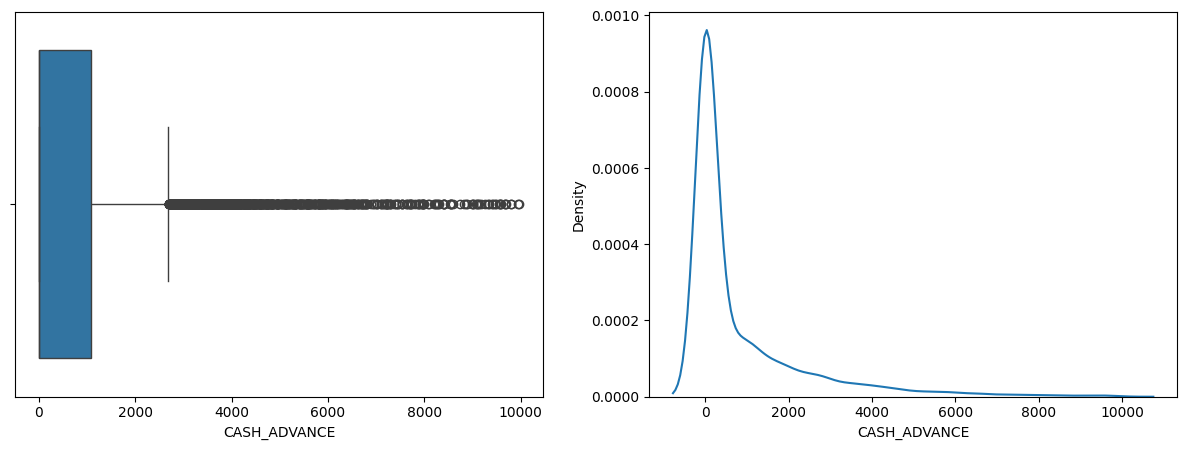

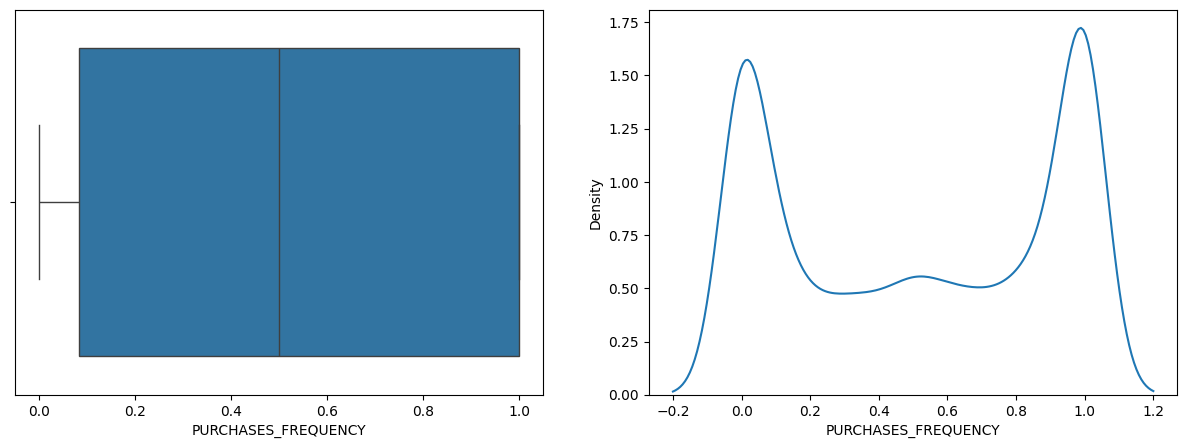

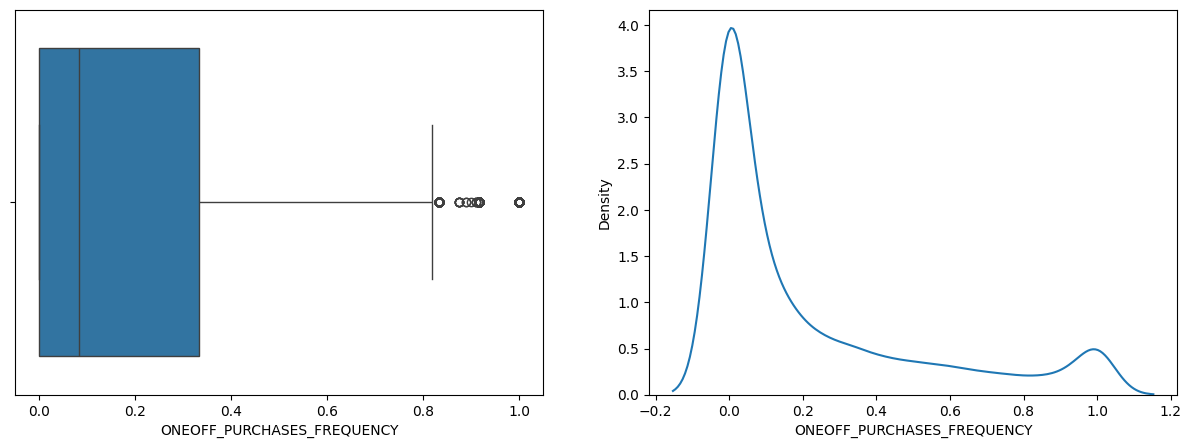

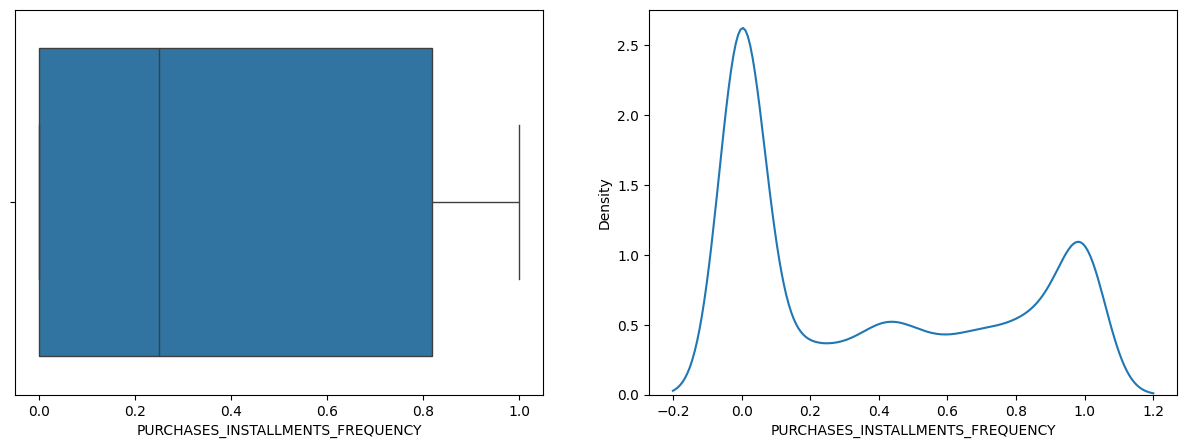

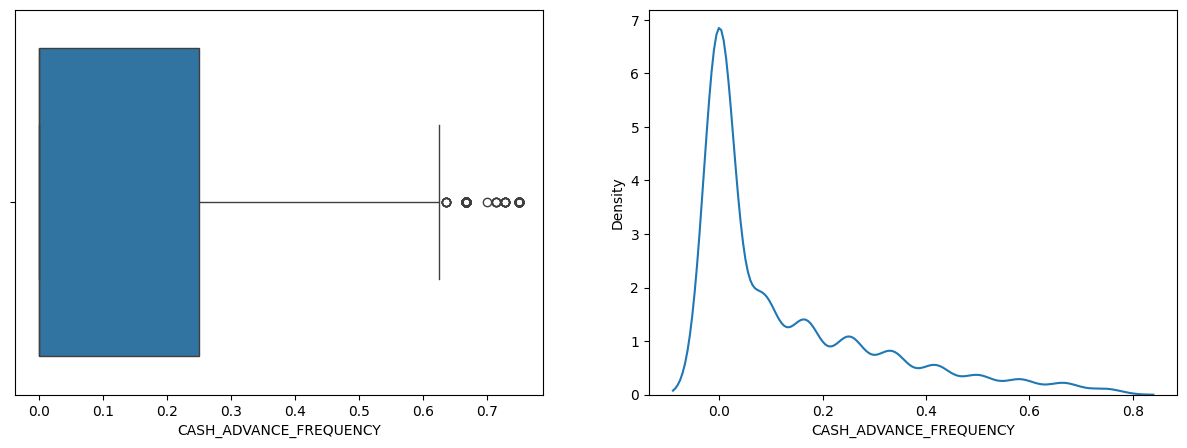

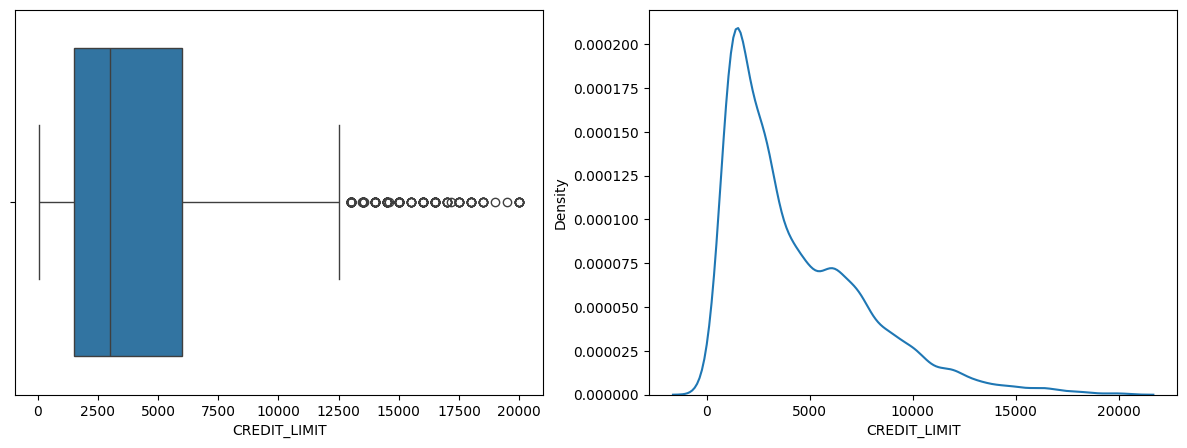

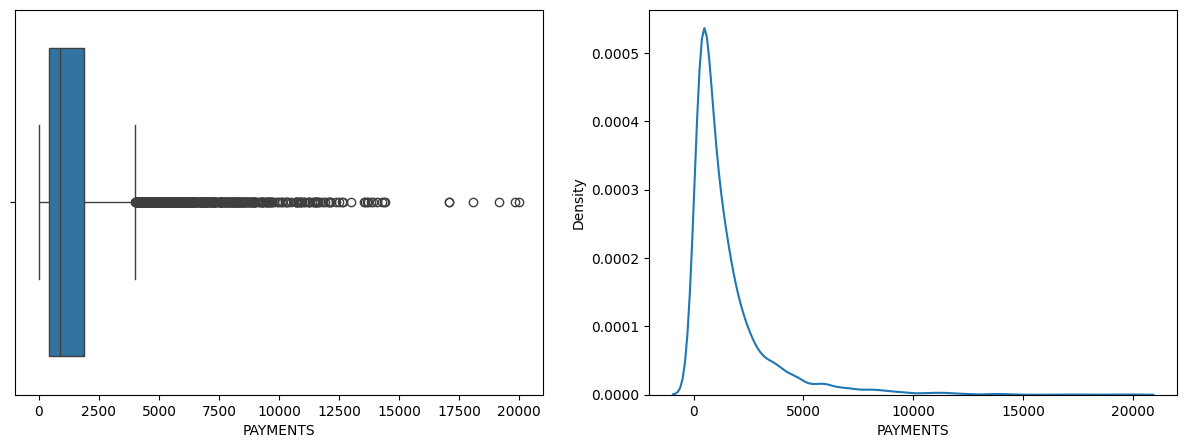

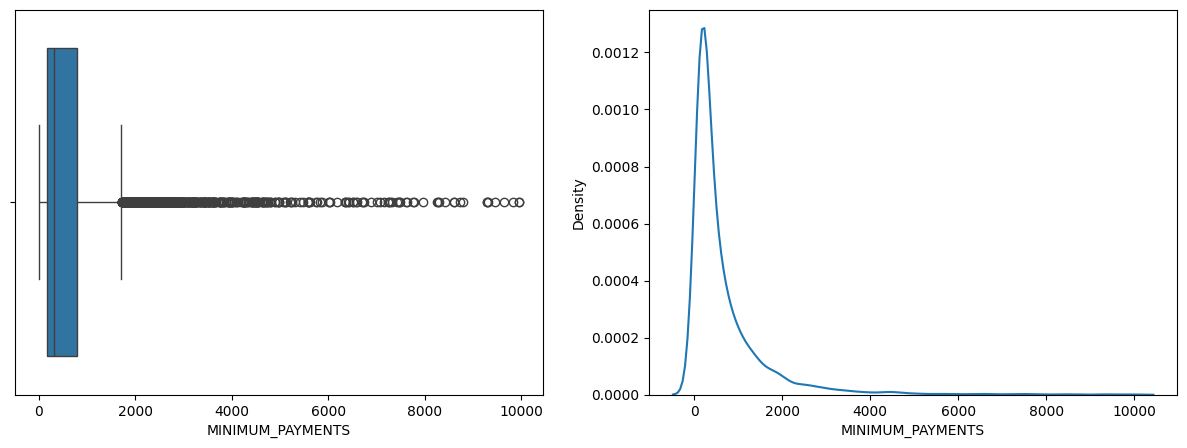

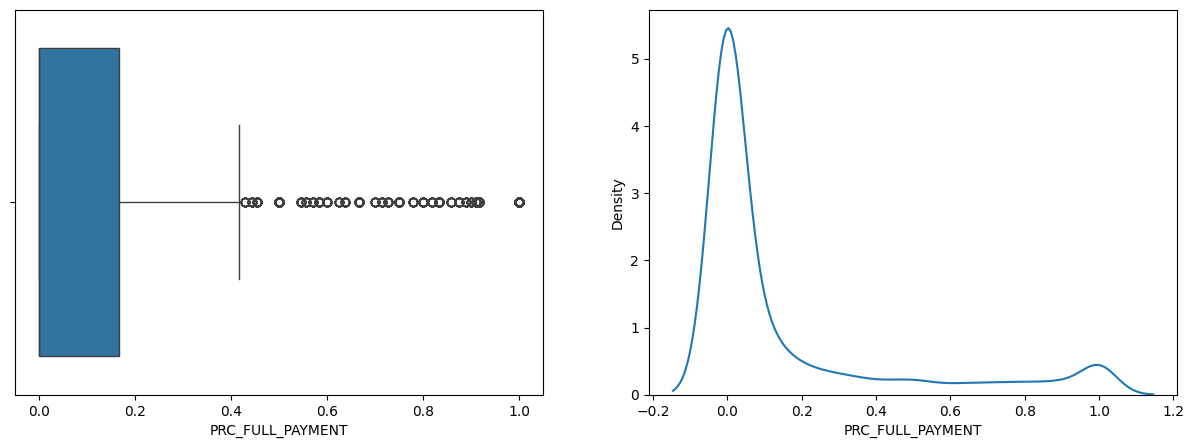

In [17]:
df_float_columns = df_3.select_dtypes(include="float64")

for column in df_float_columns.columns:

    fig, ax = plt.subplots(ncols=2, figsize=(15,5))

    sns.boxplot(
        data=df_3_no_outliers,
        x=column,
        ax=ax[0]
    )

    sns.kdeplot(
        data=df_3_no_outliers,
        x=column,
        ax=ax[1]
    )

    plt.show()

### Normalization

#### Standard Scaler

In [18]:
scaler = StandardScaler()

In [19]:
df_3_std_scaled = df_3_no_outliers.copy()

float_columns = df_3_std_scaled.select_dtypes(include="float64").columns

df_3_std_scaled[float_columns] = scaler.fit_transform(df_3_std_scaled[float_columns])

In [20]:
df_3_std_scaled.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  7.742000e+03       7.742000e+03  7.742000e+03      7.742000e+03   
mean   7.342214e-17      -4.405328e-16  9.544878e-17     -2.202664e-17   
std    1.000065e+00       1.000065e+00  1.000065e+00      1.000065e+00   
min   -8.427798e-01      -3.801380e+00 -6.345178e-01     -4.719410e-01   
25%   -7.364125e-01      -1.683627e-01 -6.010524e-01     -4.719410e-01   
50%   -3.130978e-01       4.803896e-01 -3.601029e-01     -4.298821e-01   
75%    2.843492e-01       4.803896e-01  1.553101e-01      5.324389e-02   
max    4.721160e+00       4.803896e-01  9.894761e+00      1.148540e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            7.742000e+03  7.742000e+03         7.742000e+03   
mean            -1.835553e-17 -2.202664e-17         1.147221e-16   
std              1.000065e+00  1.000065e+00         1.000065e+00   
min             -6.057888e-01 -5.476478e-01        -1.284536e+00   
25%             -6.057888e-01 -5.476478e-01        -1.076845e+00   
50%             -4.318440e-01 -5.476478e-01        -3.838149e-02   
75%              1.796728e-01  1.500757e-01         1.207773e+00   
max              7.108600e+00  5.917989e+00         1.207773e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                7.742000e+03                      7.742000e+03   
mean                -2.936886e-17                     -1.027910e-16   
std                  1.000065e+00                      1.000065e+00   
min                 -7.014253e-01                     -9.549854e-01   
25%                 -7.014253e-01                     -9.549854e-01   
50%                 -4.280691e-01                     -3.302405e-01   
75%                  3.920027e-01                      1.089635e+00   
max                  2.578862e+00                      1.543994e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            7.742000e+03       7742.000000    7742.000000  7.742000e+03   
mean             7.801102e-18          2.890209      14.905063  1.468443e-16   
std              1.000065e+00          5.255796      22.608058  1.000065e+00   
min             -7.199264e-01          0.000000       0.000000 -1.268216e+00   
25%             -7.199264e-01          0.000000       1.000000 -8.388505e-01   
50%             -7.199264e-01          0.000000       8.000000 -3.946787e-01   
75%              6.775058e-01          4.000000      19.000000  4.936647e-01   
max              3.472370e+00        107.000000     309.000000  4.639267e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  7.742000e+03      7.742000e+03      7.742000e+03  7742.000000  
mean  -1.468443e-17     -9.544878e-17     -1.835553e-17    11.539137  
std    1.000065e+00      1.000065e+00      1.000065e+00     1.308190  
min   -8.194108e-01     -7.071056e-01     -5.355851e-01     6.000000  
25%   -5.904218e-01     -5.259683e-01     -5.355851e-01    12.000000  
50%   -3.457319e-01     -3.714981e-01     -5.355851e-01    12.000000  
75%    1.740048e-01      1.149134e-01      3.578470e-02    12.000000  
max    9.831459e+00      9.665211e+00      2.892627e+00    12.000000

#### Log scaler

In [21]:
log_scaler = lambda x: np.log(x + 1)

In [22]:
df_3_log_scaled = df_3_no_outliers.copy()

float_columns = df_3_log_scaled.select_dtypes(include="float64").columns

df_3_log_scaled[float_columns] = df_3_log_scaled[float_columns].apply(log_scaler)

In [23]:
df_3_log_scaled.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  7742.000000        7742.000000  7742.000000       7742.000000   
mean      6.381816           0.655953     4.974711          3.289966   
std       1.697471           0.079208     2.907324          3.247982   
min       0.004804           0.336472     0.000000          0.000000   
25%       5.257757           0.646627     3.930108          0.000000   
50%       6.858946           0.693147     6.016839          3.931826   
75%       7.613538           0.693147     7.072422          6.438303   
max       9.209775           0.693147     9.661737          9.562123   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             7742.000000   7742.000000          7742.000000   
mean                 3.444016      3.323688             0.378389   
std                  3.075897      3.518553             0.277184   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.080042   
50%                  4.715904      0.000000             0.405465   
75%                  6.216446      6.982055             0.693147   
max                  8.499223      9.207660             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 7742.000000                       7742.000000   
mean                     0.167183                          0.282771   
std                      0.221156                          0.283747   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.080042                          0.223144   
75%                      0.287682                          0.597837   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             7742.000000       7742.000000    7742.000000   7742.000000   
mean                 0.110015          2.890209      14.905063      8.071464   
std                  0.144956          5.255796      22.608058      0.805192   
min                  0.000000          0.000000       0.000000      3.931826   
25%                  0.000000          0.000000       1.000000      7.313887   
50%                  0.000000          0.000000       8.000000      8.006701   
75%                  0.223144          4.000000      19.000000      8.699681   
max                  0.559616        107.000000     309.000000      9.903538   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  7742.000000       7742.000000       7742.000000  7742.000000  
mean      6.790824          5.935320          0.120012    11.539137  
std       1.077980          1.048074          0.211477     1.308190  
min       0.048326          0.037049          0.000000     6.000000  
25%       6.066120          5.164411          0.000000    12.000000  
50%       6.791717          5.778364          0.000000    12.000000  
75%       7.531719          6.672284          0.154151    12.000000  
max       9.903457          9.206206          0.693147    12.000000

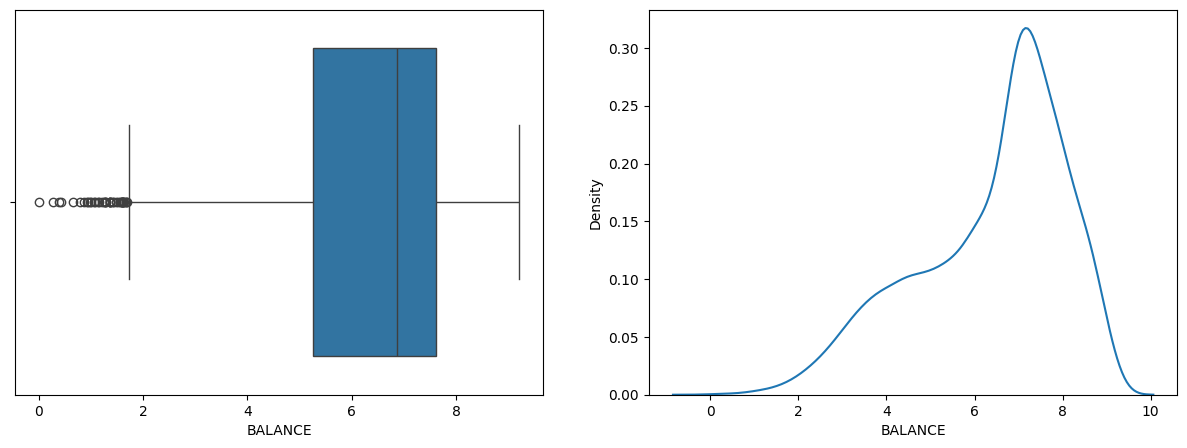

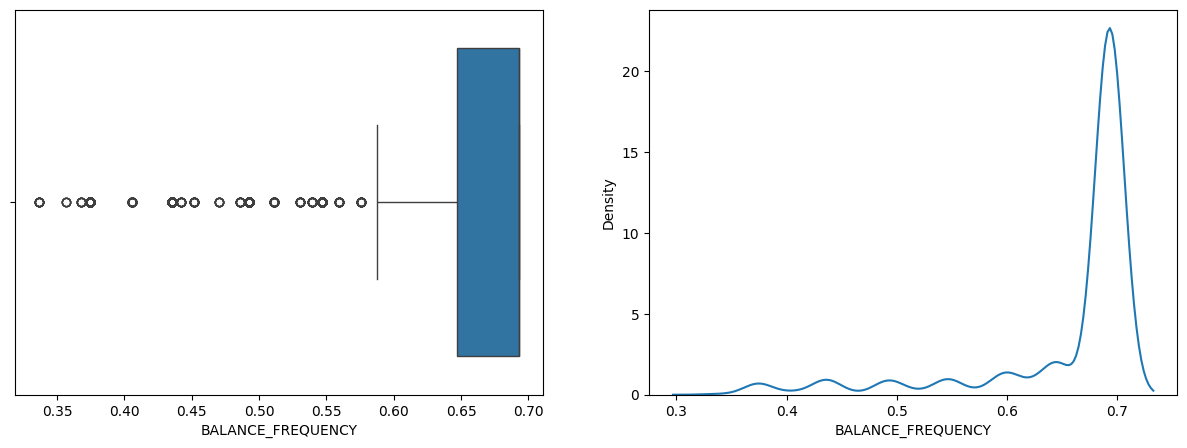

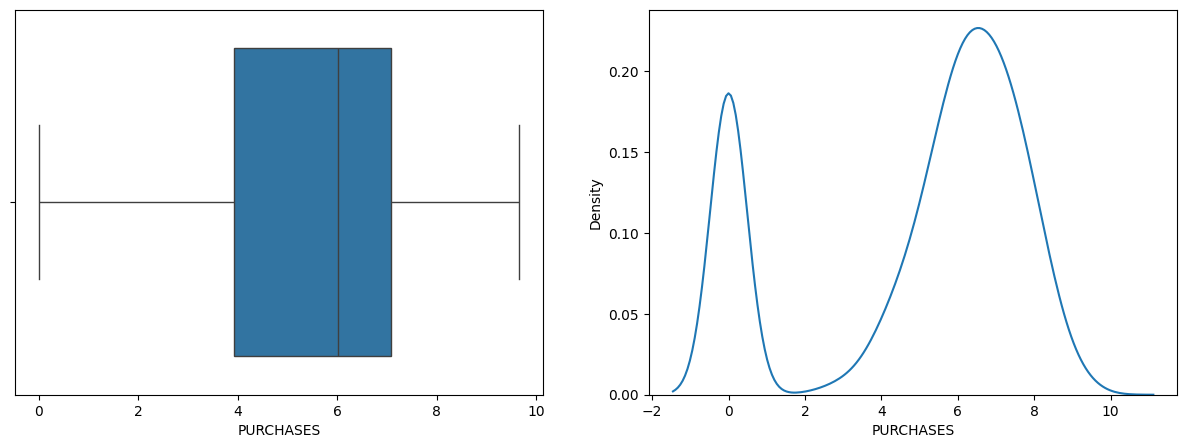

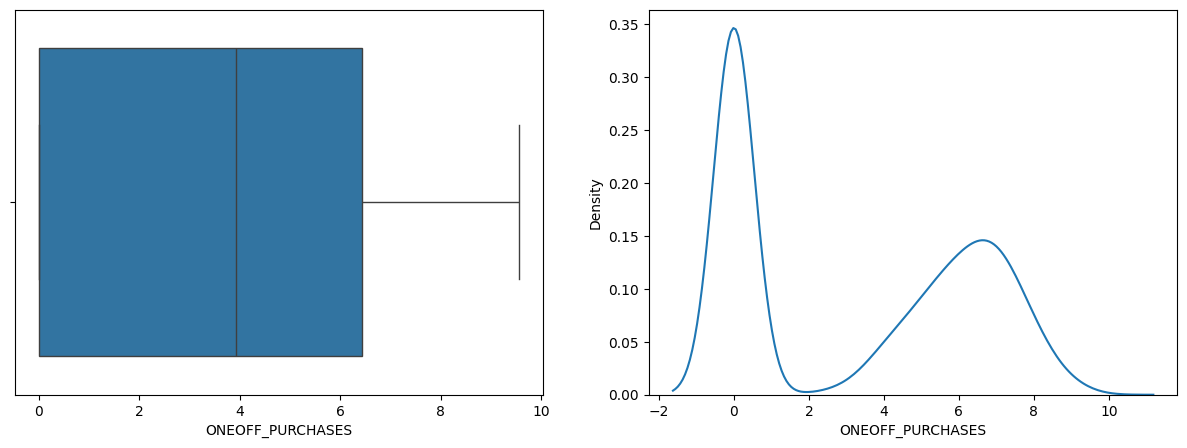

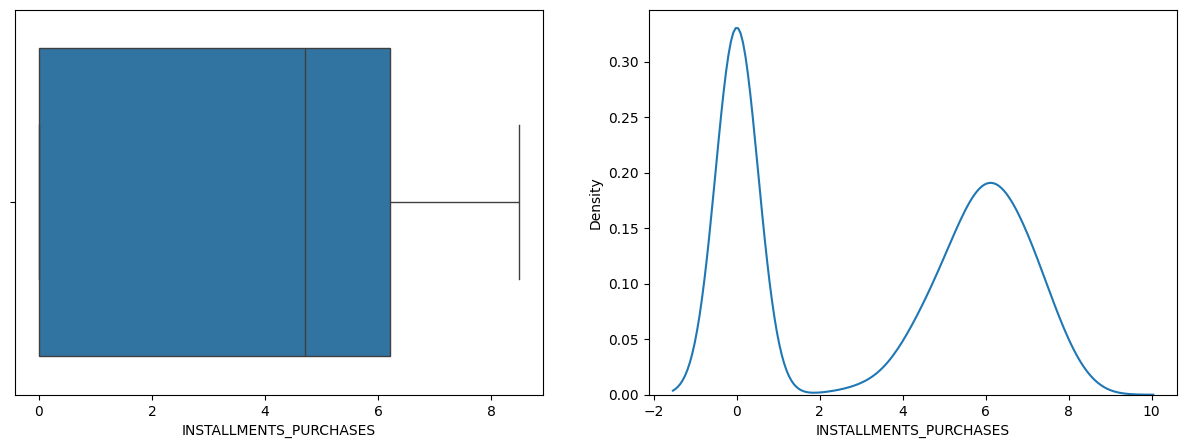

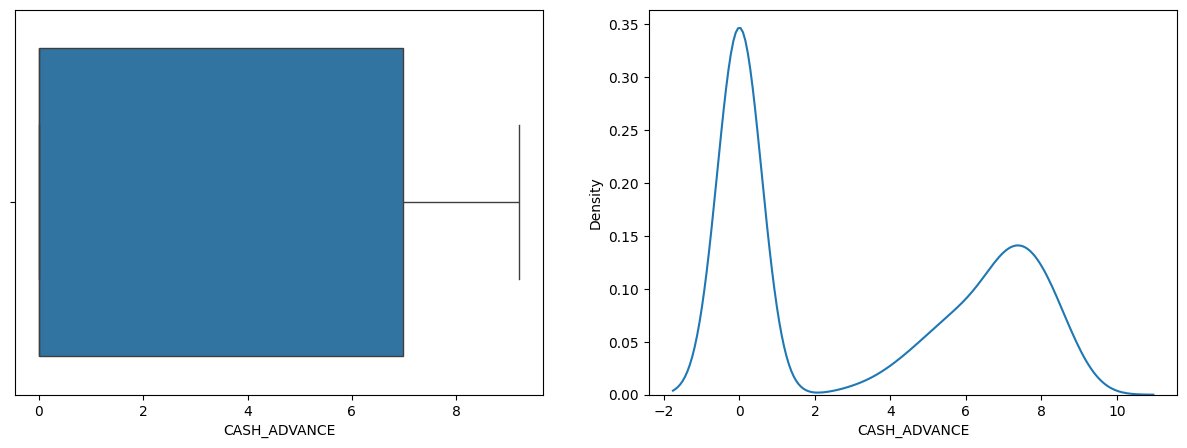

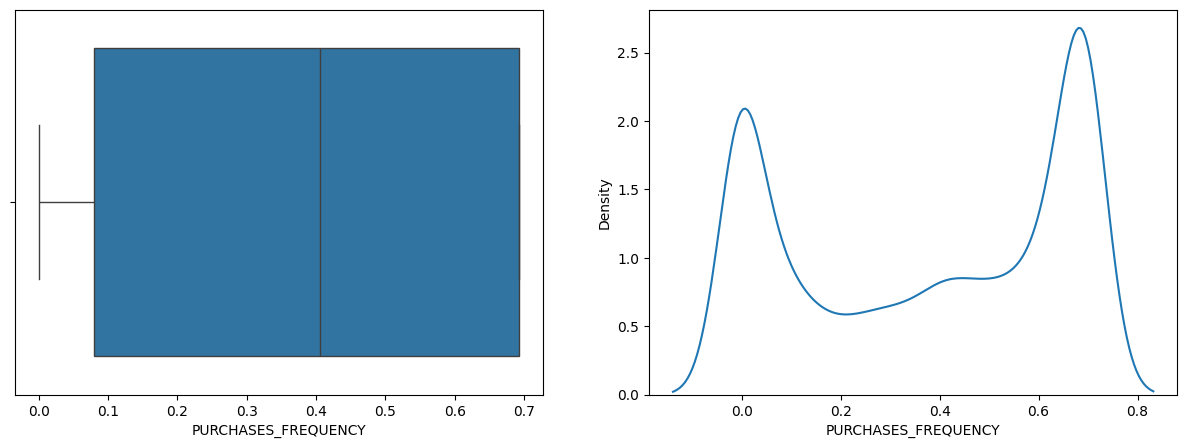

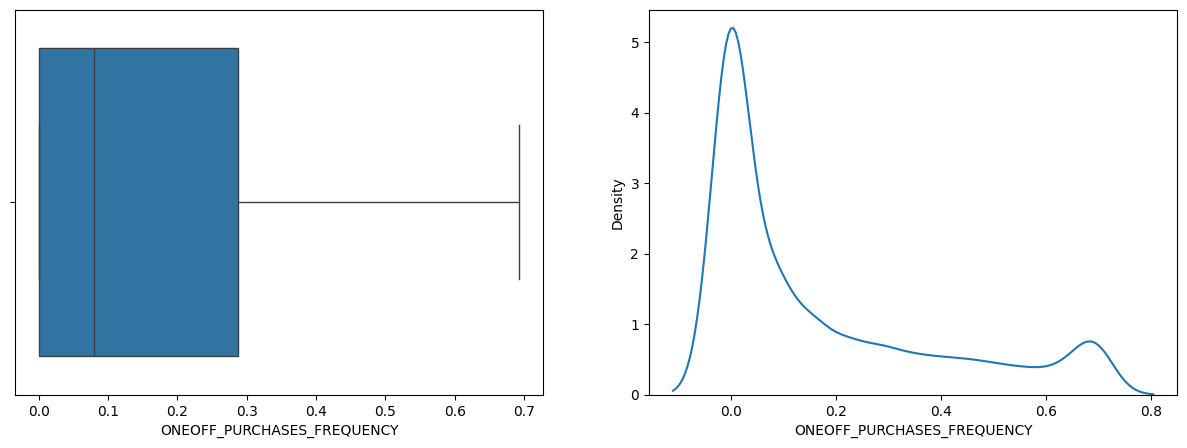

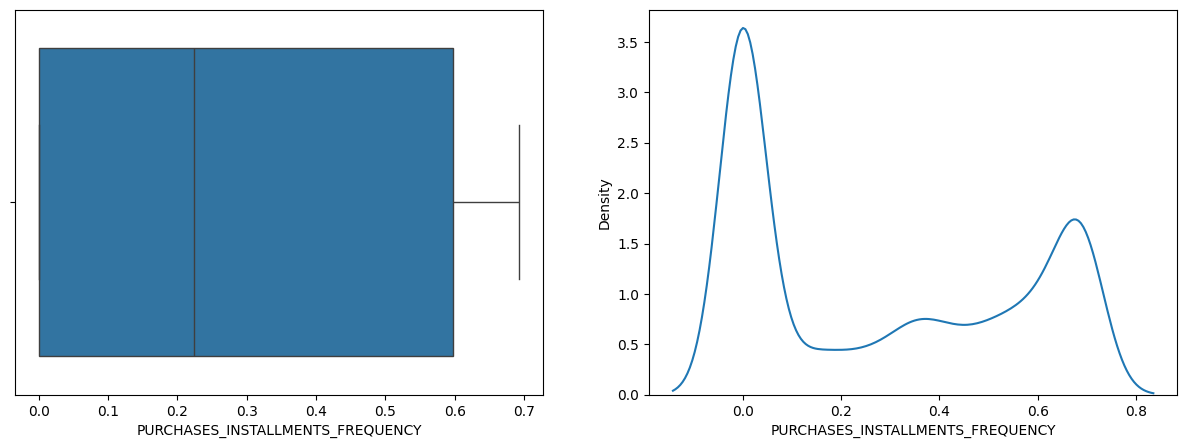

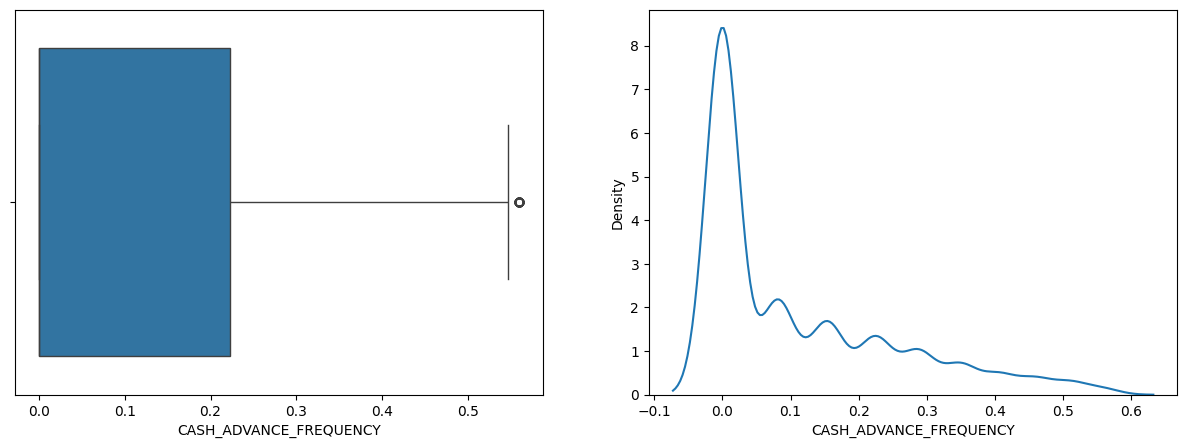

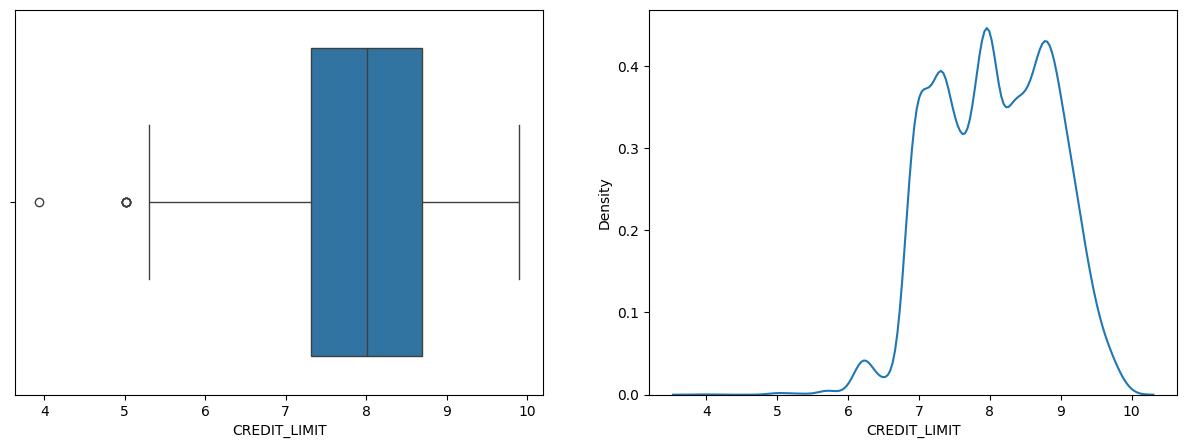

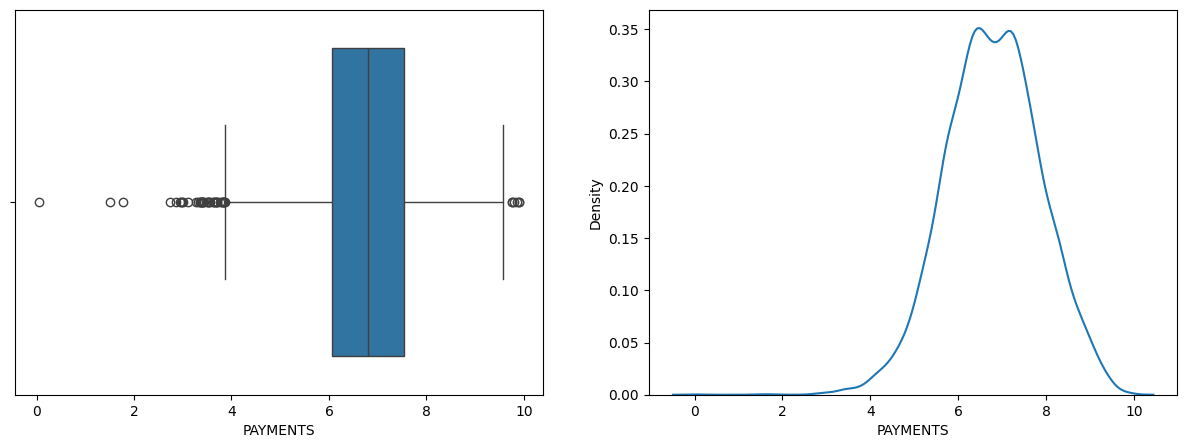

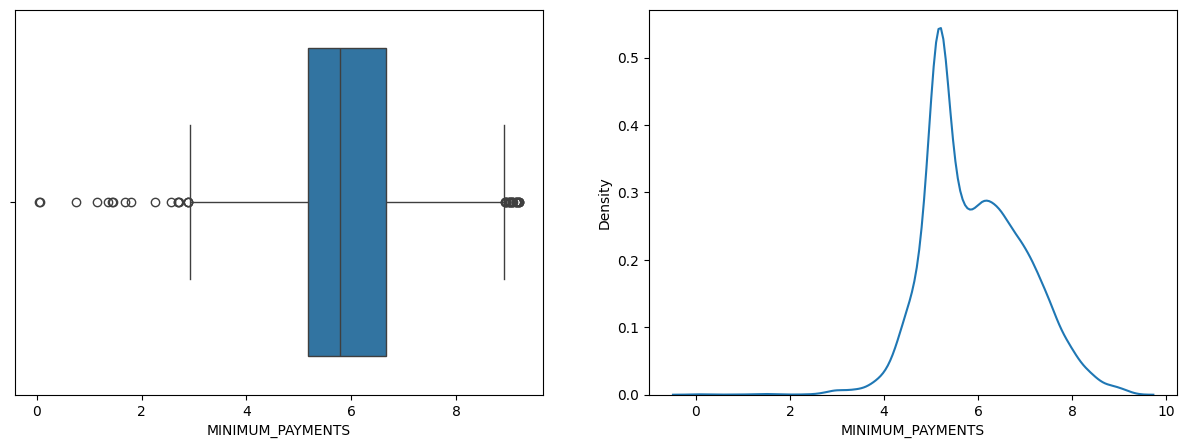

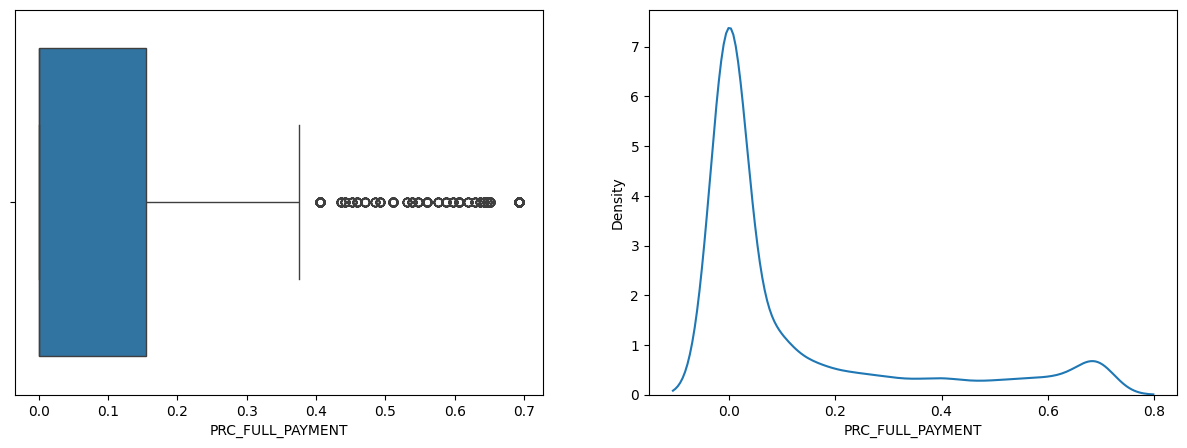

In [24]:
df_float_columns = df_3.select_dtypes(include="float64")

for column in df_float_columns.columns:

    fig, ax = plt.subplots(ncols=2, figsize=(15,5))
    sns.boxplot(
        data=df_3_log_scaled,
        x=column,
        ax=ax[0]
    )
    sns.kdeplot(
        data=df_3_log_scaled,
        x=column,
        ax=ax[1]
    )
    plt.show()

### Correlation

In [25]:
drop_columns = ["CUST_ID", "TENURE"]

#### Standard Scaler

In [26]:
df_3_std_scaled_corr = df_3_std_scaled.drop(columns=drop_columns).corr()
df_3_log_scaled_corr = df_3_log_scaled.drop(columns=drop_columns).corr()

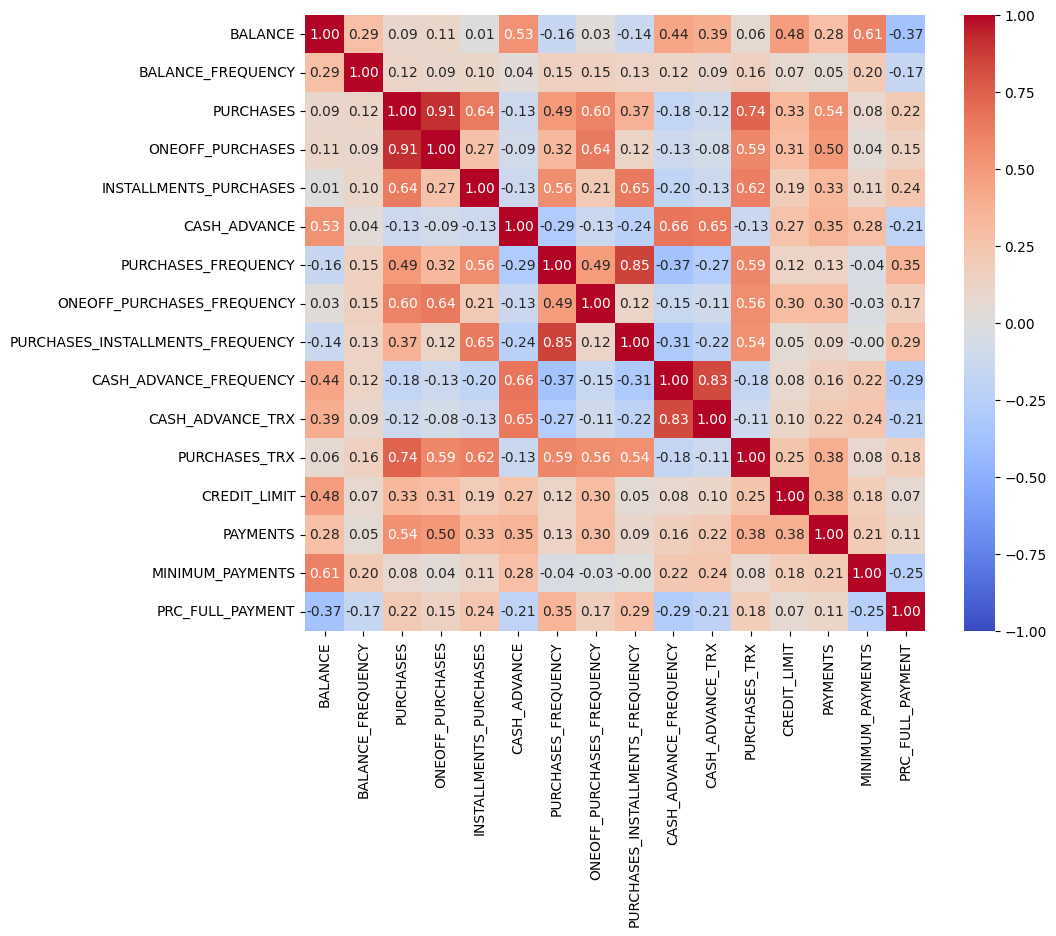

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data=df_3_std_scaled_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.show()

In [28]:
drop_std_columns = [
    "ONEOFF_PURCHASES",
    "CASH_ADVANCE_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY"
]

df_3_std_scaled_2 = df_3_std_scaled.drop(columns=drop_std_columns)
df_3_std_scaled_2_corr = df_3_std_scaled_2.drop(columns=drop_columns).corr()

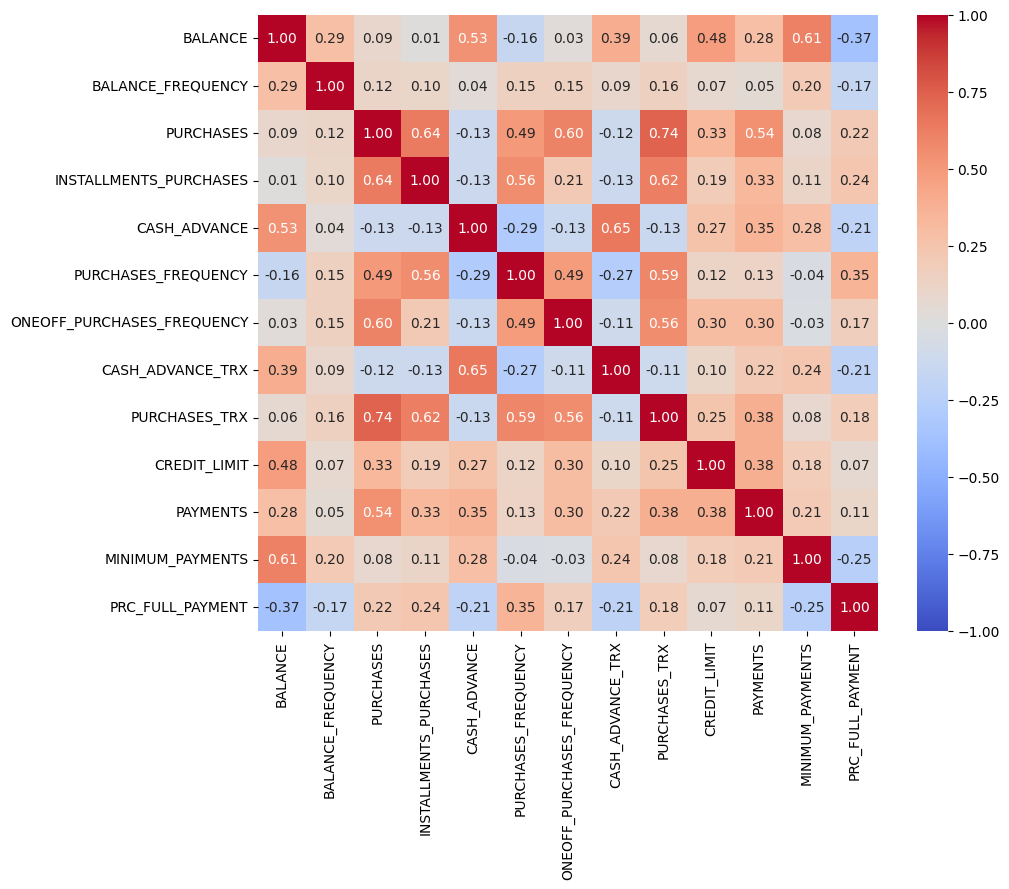

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data=df_3_std_scaled_2_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.show()

#### Log Scaler

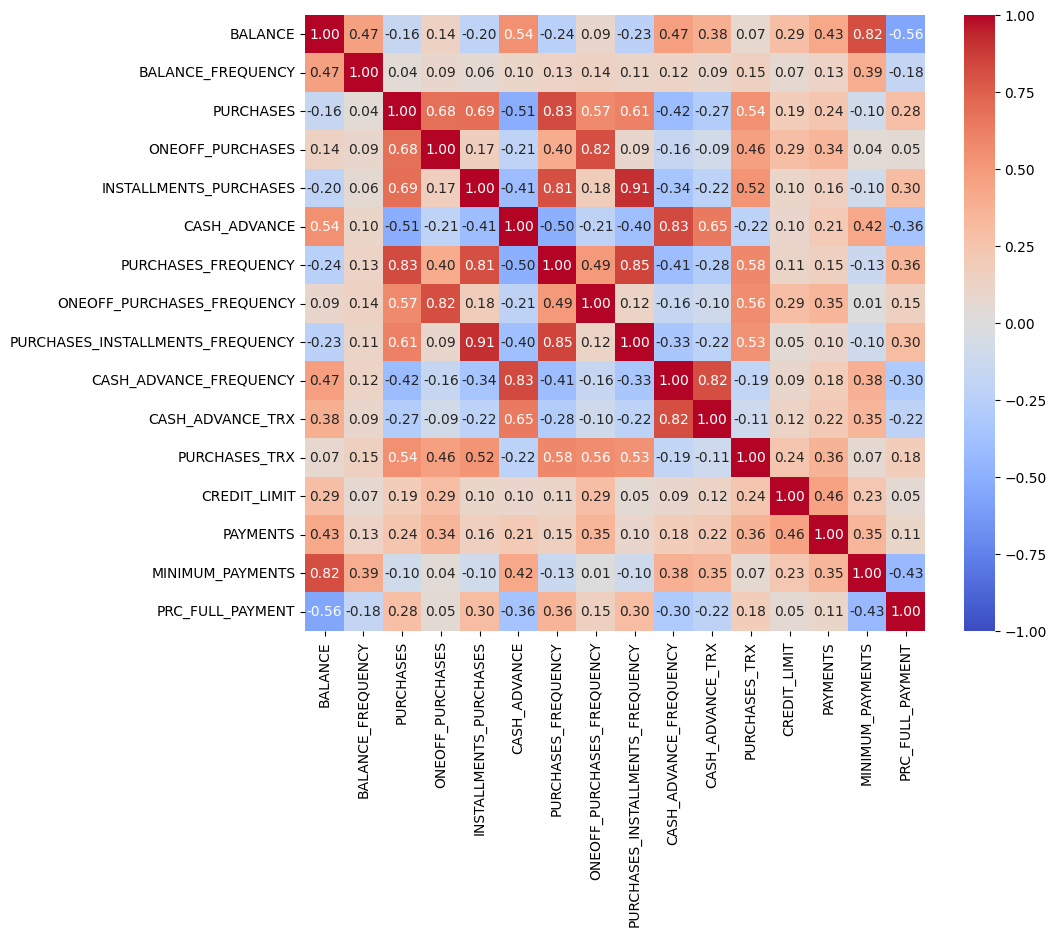

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data=df_3_log_scaled_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.show()

In [31]:
drop_log_columns = [
    "MINIMUM_PAYMENTS",
    "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY",
    "PURCHASES_FREQUENCY",
    "BALANCE_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY"
]

df_3_log_scaled_2 = df_3_log_scaled.drop(columns=drop_log_columns)
df_3_log_scaled_2_corr = df_3_log_scaled_2.drop(columns=drop_columns).corr()

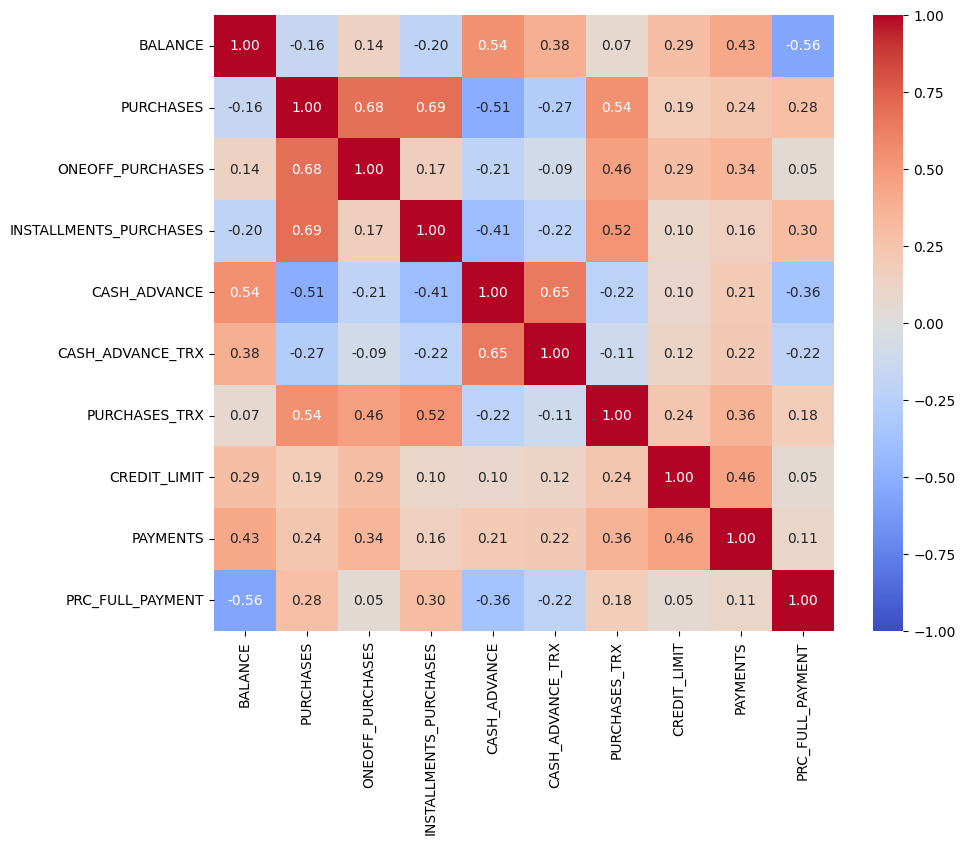

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data=df_3_log_scaled_2_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.show()

### Dimensionallity

In [33]:
pca = PCA(n_components=0.987)

In [34]:
print("Raw: (%s, %s)" % df_3_log_scaled.shape)
pca_std_components = pca.fit_transform(X=df_3_std_scaled_2.drop(columns=drop_columns))
print(pca.explained_variance_ratio_)
print("STD: (%s, %s)" % pca_std_components.shape)

pca_log_components = pca.fit_transform(X=df_3_log_scaled_2.drop(columns=drop_columns))
print(pca.explained_variance_ratio_)
print("LOG: (%s, %s)" % pca_log_components.shape)

Raw: (7742, 18)
[0.93383083 0.05117644 0.00359366]
STD: (7742, 3)
[0.88975645 0.06115511 0.01990956 0.01459196 0.00800794]
LOG: (7742, 5)


# Cluster

In [35]:
max_clusters = 10
n_init = 10

### Standard Scaler

In [36]:
kmeans_std_clusters = {}
for n_clusters in tqdm(iterable=range(2, max_clusters + 1)):

    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    kmeans.fit(X=pca_std_components)

    kmeans_std_clusters[n_clusters] = {
        "inertia": kmeans.inertia_,
        "silhouette": silhouette_score(X=pca_std_components, labels=kmeans.labels_, random_state=42),
        "davies_bouldin": davies_bouldin_score(X=pca_std_components, labels=kmeans.labels_)
    }

100%|██████████| 9/9 [00:17<00:00,  1.96s/it]


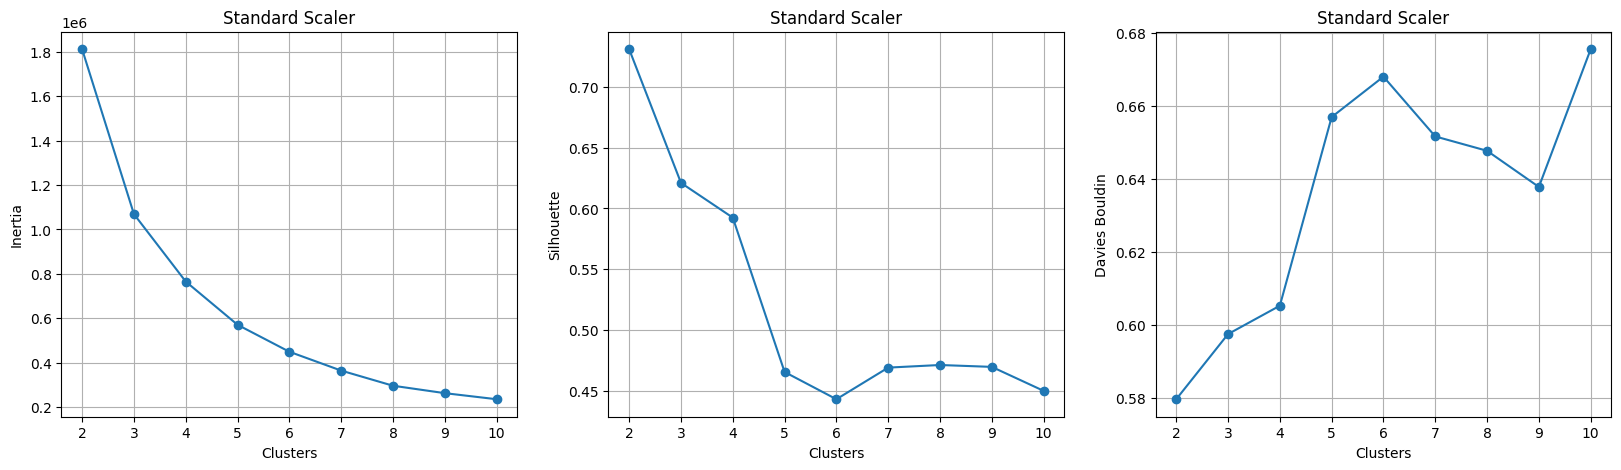

In [37]:
inertias = list(map(lambda x: x["inertia"], kmeans_std_clusters.values()))
silhouette = list(map(lambda x: x["silhouette"], kmeans_std_clusters.values()))
davies_bouldin = list(map(lambda x: x["davies_bouldin"], kmeans_std_clusters.values()))

clusters = list(kmeans_std_clusters.keys())

fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(clusters, inertias, marker="o")

ax[0].set_title(label="Standard Scaler")
ax[0].set_xlabel(xlabel="Clusters")
ax[0].set_ylabel(ylabel="Inertia")

ax[0].set_xticks(ticks=clusters)
ax[0].set_xticklabels(labels=clusters)
ax[0].grid()


ax[1].plot(clusters, silhouette, marker="o")

ax[1].set_title(label="Standard Scaler")
ax[1].set_xlabel(xlabel="Clusters")
ax[1].set_ylabel(ylabel="Silhouette")

ax[1].set_xticks(ticks=clusters)
ax[1].set_xticklabels(labels=clusters)
ax[1].grid()


ax[2].plot(clusters, davies_bouldin, marker="o")

ax[2].set_title(label="Standard Scaler")
ax[2].set_xlabel(xlabel="Clusters")
ax[2].set_ylabel(ylabel="Davies Bouldin")

ax[2].set_xticks(ticks=clusters)
ax[2].set_xticklabels(labels=clusters)
ax[2].grid()

plt.show()

### Log Scaler

In [38]:
kmeans_log_clusters = {}
for n_clusters in tqdm(iterable=range(2, max_clusters + 1)):

    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    kmeans.fit(X=pca_log_components)

    kmeans_log_clusters[n_clusters] = {
        "inertia": kmeans.inertia_,
        "silhouette": silhouette_score(X=pca_log_components, labels=kmeans.labels_, random_state=42),
        "davies_bouldin": davies_bouldin_score(X=pca_log_components, labels=kmeans.labels_)
    }

100%|██████████| 9/9 [00:17<00:00,  1.89s/it]


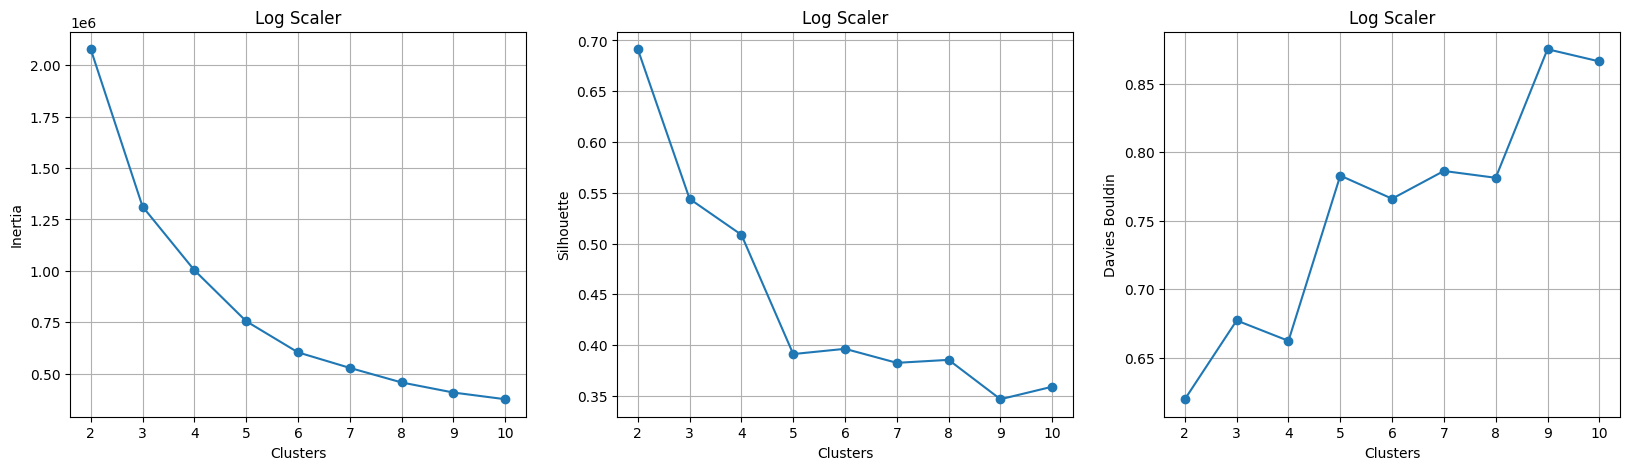

In [39]:
inertias = list(map(lambda x: x["inertia"], kmeans_log_clusters.values()))
silhouette = list(map(lambda x: x["silhouette"], kmeans_log_clusters.values()))
davies_bouldin = list(map(lambda x: x["davies_bouldin"], kmeans_log_clusters.values()))

clusters = list(kmeans_log_clusters.keys())

fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(clusters, inertias, marker="o")

ax[0].set_title(label="Log Scaler")
ax[0].set_xlabel(xlabel="Clusters")
ax[0].set_ylabel(ylabel="Inertia")

ax[0].set_xticks(ticks=clusters)
ax[0].set_xticklabels(labels=clusters)
ax[0].grid()


ax[1].plot(clusters, silhouette, marker="o")

ax[1].set_title(label="Log Scaler")
ax[1].set_xlabel(xlabel="Clusters")
ax[1].set_ylabel(ylabel="Silhouette")

ax[1].set_xticks(ticks=clusters)
ax[1].set_xticklabels(labels=clusters)
ax[1].grid()


ax[2].plot(clusters, davies_bouldin, marker="o")

ax[2].set_title(label="Log Scaler")
ax[2].set_xlabel(xlabel="Clusters")
ax[2].set_ylabel(ylabel="Davies Bouldin")

ax[2].set_xticks(ticks=clusters)
ax[2].set_xticklabels(labels=clusters)
ax[2].grid()

plt.show()

# Model

In [40]:
final_n_clusters = 5

In [41]:
kmeans = KMeans(n_clusters=final_n_clusters, n_init=n_init, random_state=42)
kmeans.fit(X=pca_std_components)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [42]:
# Categorize data.
df_4 = df_3_no_outliers.copy()
df_4["CLUSTER"] = kmeans.labels_
df_4["CLUSTER"] = df_4["CLUSTER"].astype("category")

## Cluster view

In [43]:
pca_cluster_view = PCA(n_components=2)
pca_cluster_view_components = pca_cluster_view.fit_transform(X=pca_std_components)

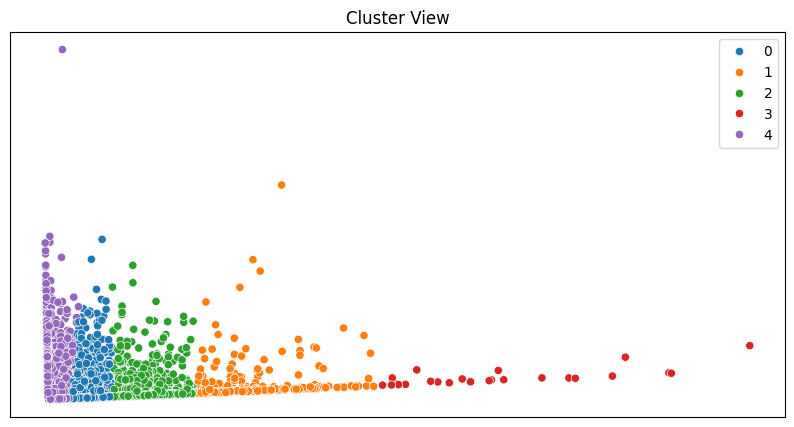

In [44]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x=pca_cluster_view_components[:, 0],
    y=pca_cluster_view_components[:, 1],
    hue=kmeans.labels_,
    palette="tab10",
    ax=ax
)

ax.set_title(label="Cluster View")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

## Analyse cluster

In [45]:
CLUSTER_COLOR = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd"
]

In [46]:
df_4.shape

(7742, 19)

In [47]:
df_4.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10005   817.714335           1.000000      16.00             16.00   
4  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00      0.000000             0.083333   
4                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
3                    0.00                 0              1        1200.0   
4                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE CLUSTER  
0   201.802084        139.509787          0.000000      12       4  
1  4103.032597       1072.340217          0.222222      12       4  
2   622.066742        627.284787          0.000000      12       0  
3   678.334763        244.791237          0.000000      12       4  
4  1400.057770       2407.246035          0.000000      12       4

In [48]:
df_4.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  7742.000000        7742.000000   7742.000000       7742.000000   
mean   1513.714789           0.932683    946.360515        561.048136   
std    1796.207907           0.140138   1491.560336       1188.886673   
min       0.004816           0.400000      0.000000          0.000000   
25%     191.050269           0.909091     49.912500          0.000000   
50%     951.362429           1.000000    409.280000         50.000000   
75%    2024.432042           1.000000   1178.000000        624.345000   
max    9993.352521           1.000000  15704.040000      14215.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             7742.000000   7742.000000          7742.000000   
mean               385.564275    844.661094             0.515400   
std                636.507627   1542.443336             0.401260   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                110.710000      0.000000             0.500000   
75%                499.920000   1076.129400             1.000000   
max               4909.950000   9972.234861             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 7742.000000                       7742.000000   
mean                     0.213830                          0.382150   
std                      0.304871                          0.400189   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.250000   
75%                      0.333333                          0.818182   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             7742.000000       7742.000000    7742.000000   7742.000000   
mean                 0.128795          2.890209      14.905063   4332.858624   
std                  0.178911          5.255796      22.608058   3377.290344   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       8.000000   3000.000000   
75%                  0.250000          4.000000      19.000000   6000.000000   
max                  0.750000        107.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   7742.000000       7742.000000       7742.000000  7742.000000  
mean    1538.595747        678.878264          0.156229    11.539137  
std     1877.746415        960.089116          0.291716     1.308190  
min        0.049513          0.037744          0.000000     6.000000  
25%      430.004927        173.934429          0.000000    12.000000  
50%      889.440869        322.229976          0.000000    12.000000  
75%     1865.311556        789.198202          0.166667    12.000000  
max    19998.389690       9957.742740          1.000000    12.000000

### Distribution

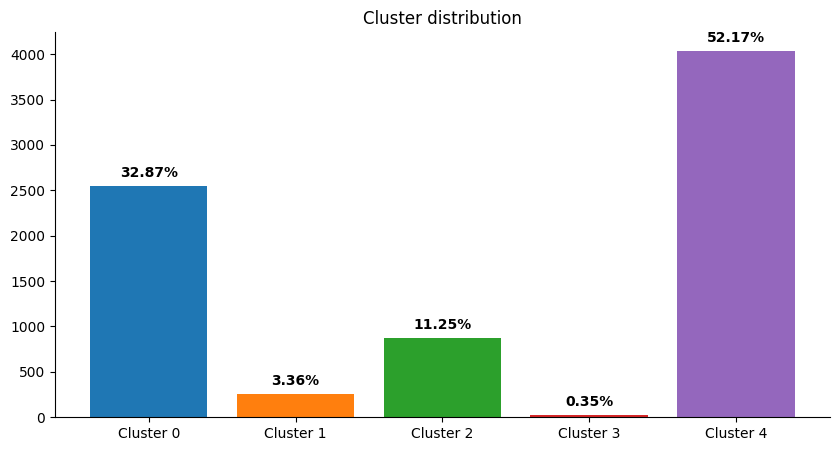

In [49]:
fig, ax = plt.subplots(ncols=1, figsize=(10,5))

ax.bar(
    x=range(final_n_clusters),
    height=df_4["CLUSTER"].value_counts().sort_index(),
    color=CLUSTER_COLOR
)
sns.despine()

# Compute percentage.
total = df_4["CLUSTER"].value_counts().sum()
percentage = df_4["CLUSTER"].value_counts() / total * 100
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 100,
        s=f"{percentage[i]:.2f}%",
        ha="center",
        fontweight="bold"
    )

ax.set_title(label="Cluster distribution")
ax.set_xticks(range(final_n_clusters))
ax.set_xticklabels(labels=[
    "Cluster %s" % i
    for i in range(final_n_clusters)
])

plt.show()

### Purchases

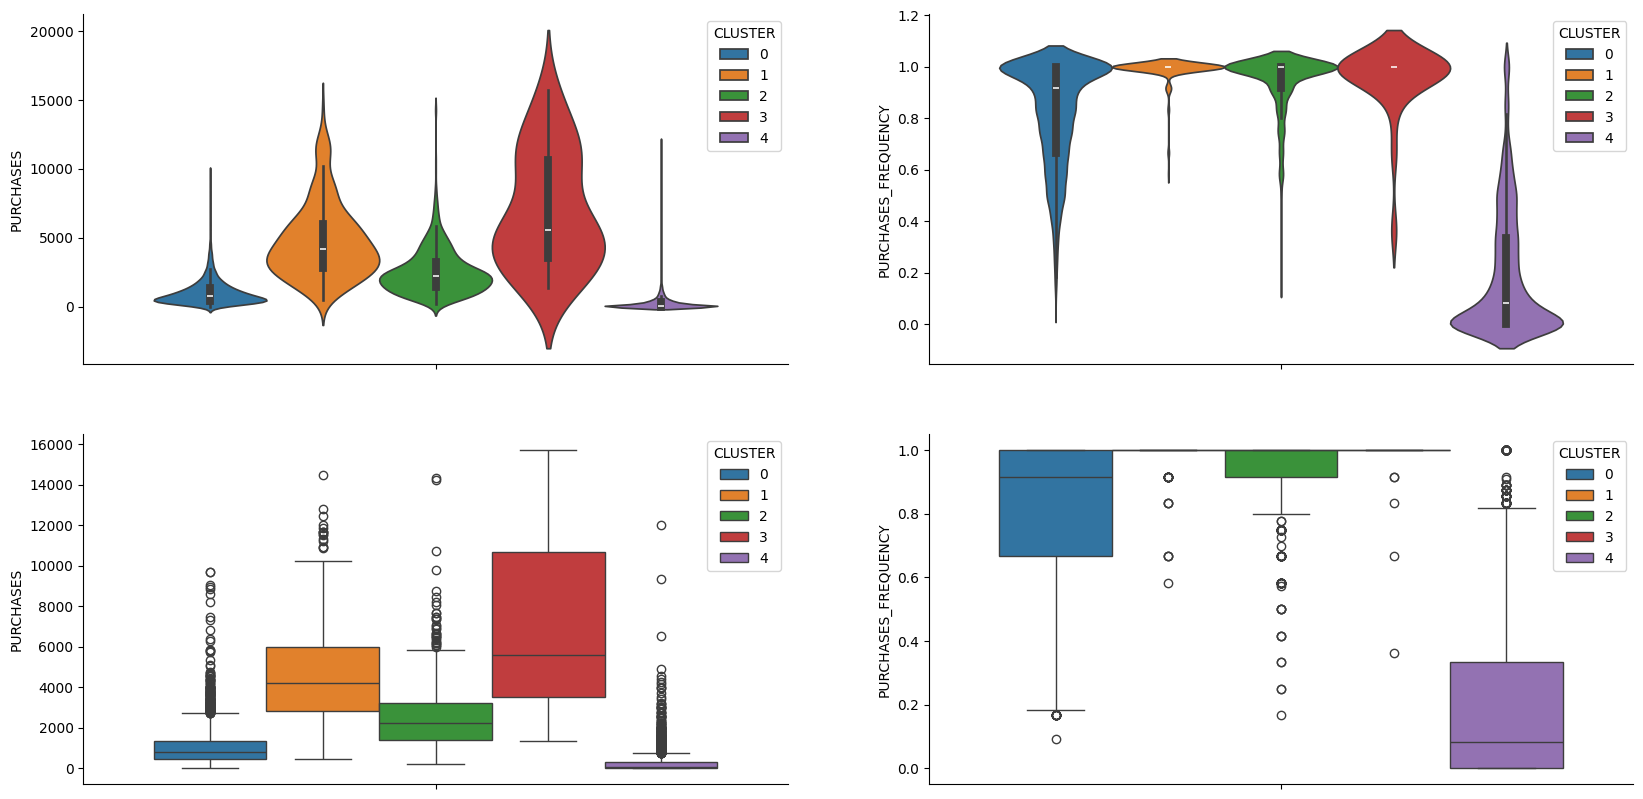

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="PURCHASES",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[0][0]
)

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="PURCHASES_FREQUENCY",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[0][1]
)

sns.boxplot(
    data=df_4,
    hue="CLUSTER",
    y="PURCHASES",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[1][0]
)

sns.boxplot(
    data=df_4,
    hue="CLUSTER",
    y="PURCHASES_FREQUENCY",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[1][1]
)


sns.despine()
plt.show()

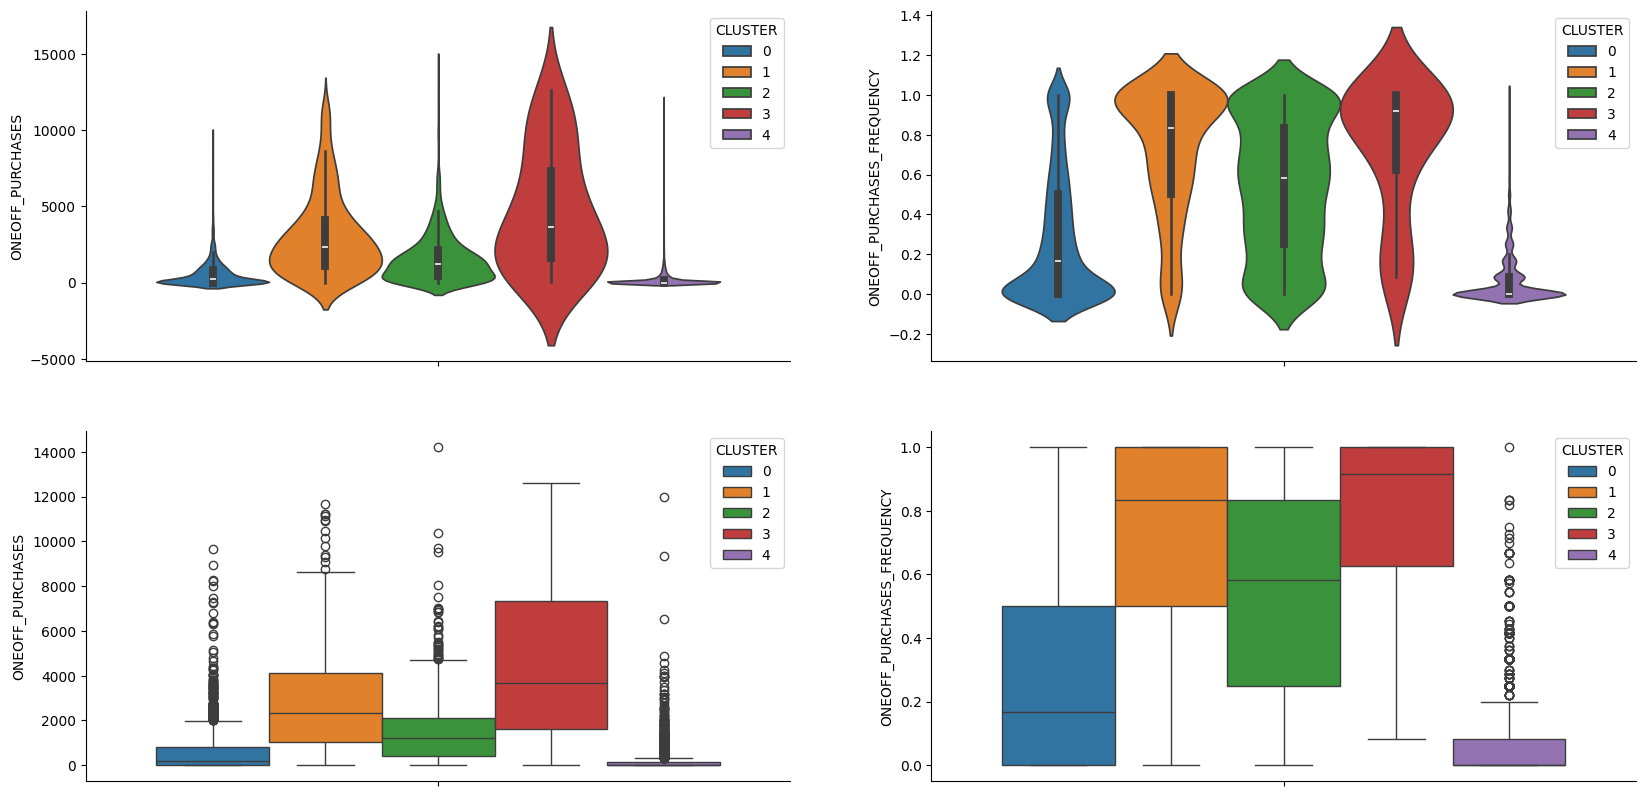

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="ONEOFF_PURCHASES",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[0][0]
)

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="ONEOFF_PURCHASES_FREQUENCY",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[0][1]
)

sns.boxplot(
    data=df_4,
    hue="CLUSTER",
    y="ONEOFF_PURCHASES",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[1][0]
)

sns.boxplot(
    data=df_4,
    hue="CLUSTER",
    y="ONEOFF_PURCHASES_FREQUENCY",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[1][1]
)

sns.despine()
plt.show()

### Balance

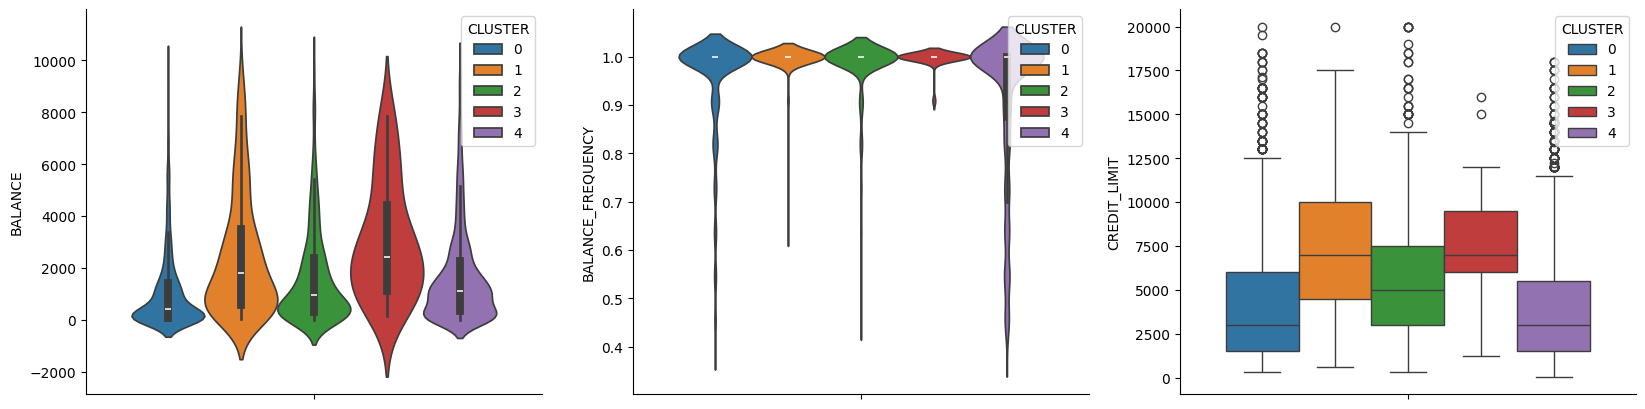

In [52]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="BALANCE",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[0]
)

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="BALANCE_FREQUENCY",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[1]
)

sns.boxplot(
    data=df_4,
    hue="CLUSTER",
    y="CREDIT_LIMIT",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[2]
)

sns.despine()
plt.show()

### Tenure

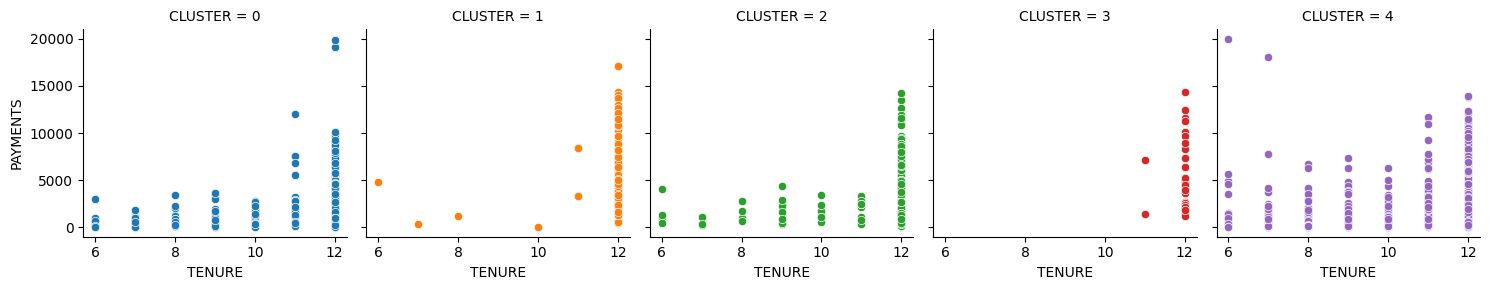

In [53]:
grid = sns.FacetGrid(
    data=df_4,
    col="CLUSTER",
    hue="CLUSTER"
)
grid.map(sns.scatterplot, "TENURE", "PAYMENTS")
plt.show()

### Cash advance

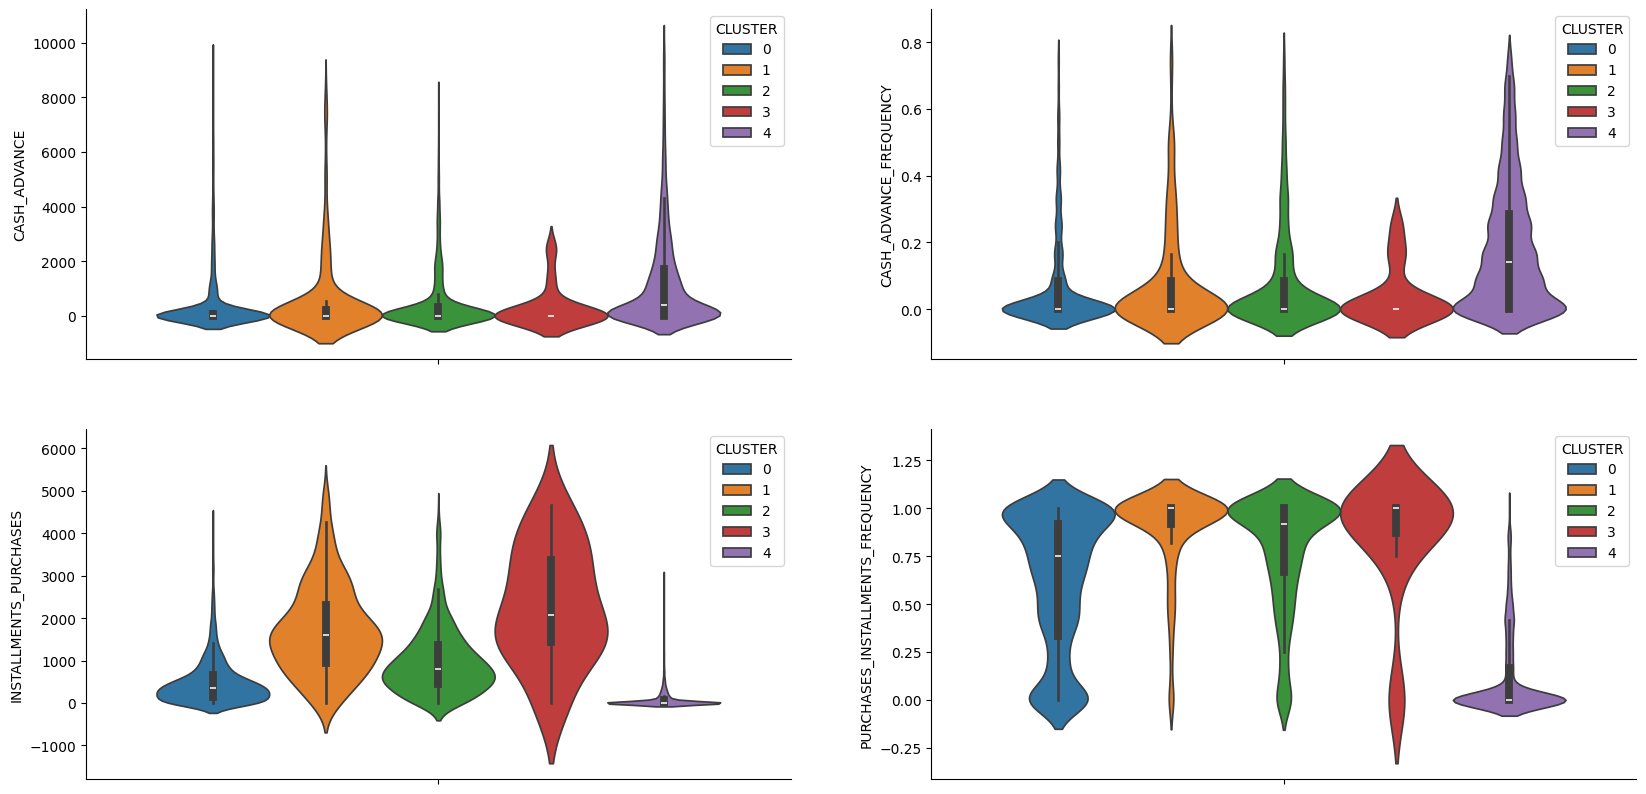

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="CASH_ADVANCE",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[0][0]
)

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="CASH_ADVANCE_FREQUENCY",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[0][1]
)

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="INSTALLMENTS_PURCHASES",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[1][0]
)

sns.violinplot(
    data=df_4,
    hue="CLUSTER",
    y="PURCHASES_INSTALLMENTS_FREQUENCY",
    palette=CLUSTER_COLOR,
    legend=True,
    ax=ax[1][1]
)

sns.despine()
plt.show()

## Final view

In [55]:
pca_final_cluster_view = PCA(n_components=3)
pca_final_cluster_view_components = pca_final_cluster_view.fit_transform(
    X=pca_std_components
)

In [56]:
fig = px.scatter_3d(
    x=pca_final_cluster_view_components[:, 0],
    y=pca_final_cluster_view_components[:, 1],
    z=pca_final_cluster_view_components[:, 2],
    color=df_4["CLUSTER"],
    color_discrete_map={
        i: color
        for i, color in enumerate(CLUSTER_COLOR)
    },
    width=1000,
    height=400
)
fig.update_traces(marker_size=3)

labels = {
    "0": "Users that normally request more offen installmensts and don't spend to much in one-go.",
    "1": "Users with high credit card limit but have a balanced spending.",
    "2": "Users that uses the credit card for all types of purchases. Probably, it is the main credit card of them.",
    "3": "Users that spend a lot with credit card. Normally, they spend high quantities in purchases at once.",
    "4": "Invactive users. They don't use too much their credit card and normally just buying cheap items."
}
fig.for_each_trace(lambda trace: trace.update(name=labels[trace.name]))

fig.show()